# 1. Importing Libraries

In [1]:
!pip install split-folders
import splitfolders

In [16]:
input_folder = '/home/dhrubo/Downloads/FracAtlas/fracture11'
splitfolders.ratio(input_folder, output="/home/dhrubo/Downloads/FracAtlas/OUTPUT", 
                   seed=42, ratio=(.8, .1, .1), 
                   group_prefix=None) # default values

Copying files: 9600 files [00:06, 1456.73 files/s]


You should download timm library (pip install timm)

In [3]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 697.7 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [4]:
!pip install einops

In [17]:
import torchvision
import torch
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import glob
import math
import timm
from PIL import ImageFilter
from einops import rearrange
from timm.loss import LabelSmoothingCrossEntropy

# 2. Configurations

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

num_epochs = 10
lr = 0.001
batch_size = 32
num_workers = 4

In [19]:
class_names = os.listdir('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train')
class_names.sort()
class_len = len(class_names)

# 3. Building Dataset

In [20]:
import glob
import random
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class fracture_Dataset(Dataset):
    
    def __init__(self, dataset_name, img_dir='/home/dhrubo/Downloads/FracAtlas/OUTPUT/train'):
        self.dataset_name = dataset_name
        self.img_dir = img_dir
        self.class_names = sorted([name for name in os.listdir(img_dir)])
        
        self.img_path = []
        for name in self.class_names:
            self.img_path.extend(glob.glob(f'{img_dir}/{name}/*.jpg'))
        
        self.labels = np.array([self.class_names.index(path.split('/')[-2]) for path in self.img_path])
        
        self.img_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),  # Convert image to tensor
        ])
        
    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')
        img = self.img_transforms(img)
        lbl = torch.tensor(self.labels[index], dtype=torch.long)
        
        return img, lbl
    
    def __len__(self):
        return len(self.img_path)

7679


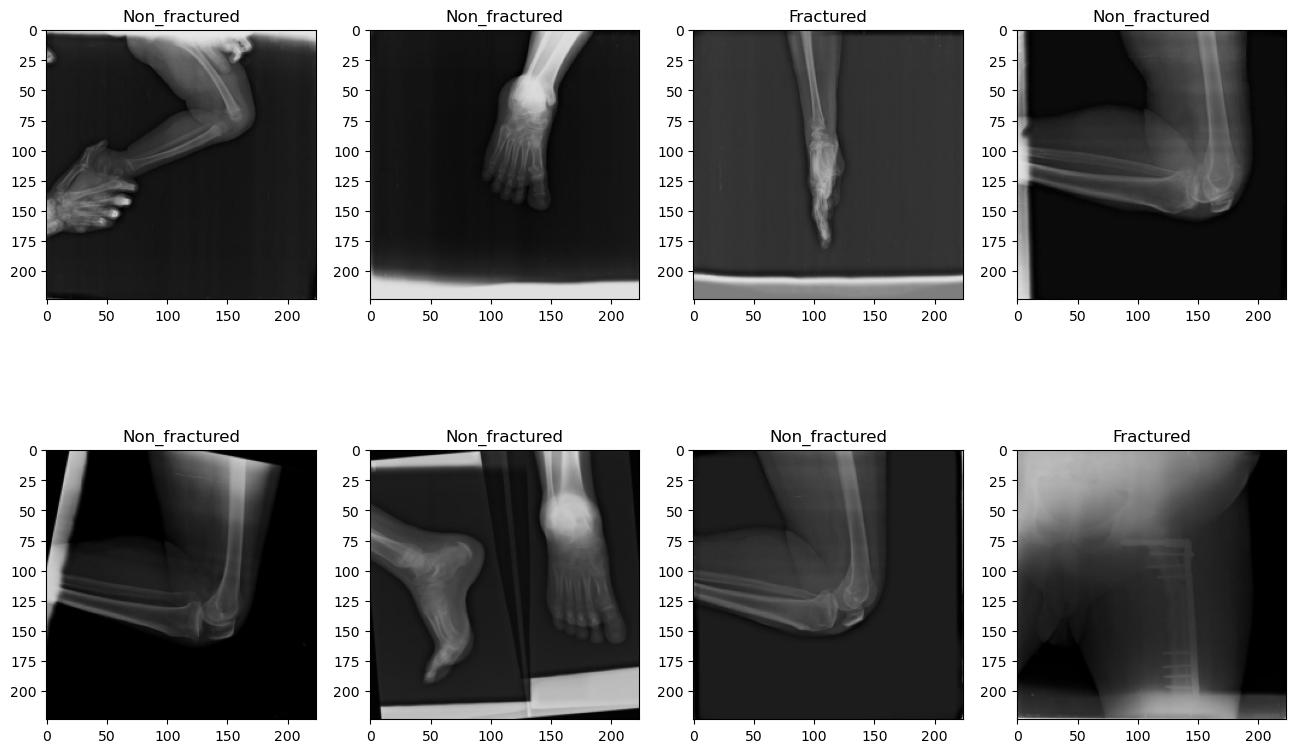

In [21]:
train_dataset = fracture_Dataset('train')
print(train_dataset.__len__())
_, ax = plt.subplots(2, 4, figsize=(16,10))

for i in range(8):
    data = train_dataset.__getitem__(np.random.choice(range(train_dataset.__len__())))

    image = data[0].cpu().detach().numpy().transpose(1, 2, 0) * 255
    image = image.astype(np.uint32)

    label = data[1]

    ax[i//4][i-(i//4)*4].imshow(image)
    ax[i//4][i-(i//4)*4].set_title(class_names[label])

# swin_tiny_patch4_window7_224


--- Fold 1/10 ---


Fold 1, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 1/50: Train Loss: 0.4478, Train Acc: 82.33% | Val Loss: 0.4294, Val Acc: 79.17%


Fold 1, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.91it/s]


Fold 1, Epoch 2/50: Train Loss: 0.3826, Train Acc: 84.84% | Val Loss: 0.3256, Val Acc: 86.07%


Fold 1, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 1, Epoch 3/50: Train Loss: 0.3583, Train Acc: 85.57% | Val Loss: 0.3273, Val Acc: 85.55%


Fold 1, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 4/50: Train Loss: 0.3394, Train Acc: 85.91% | Val Loss: 0.2816, Val Acc: 88.54%


Fold 1, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 5/50: Train Loss: 0.3177, Train Acc: 86.82% | Val Loss: 0.2880, Val Acc: 87.37%


Fold 1, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 6/50: Train Loss: 0.3020, Train Acc: 88.08% | Val Loss: 0.2800, Val Acc: 89.71%


Fold 1, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 7/50: Train Loss: 0.2984, Train Acc: 88.21% | Val Loss: 0.2940, Val Acc: 88.02%


Fold 1, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 8/50: Train Loss: 0.2934, Train Acc: 88.66% | Val Loss: 0.2730, Val Acc: 88.80%


Fold 1, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 9/50: Train Loss: 0.2791, Train Acc: 88.84% | Val Loss: 0.3404, Val Acc: 86.33%


Fold 1, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 10/50: Train Loss: 0.2746, Train Acc: 89.58% | Val Loss: 0.2896, Val Acc: 89.19%


Fold 1, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 11/50: Train Loss: 0.2677, Train Acc: 89.81% | Val Loss: 0.2432, Val Acc: 91.80%


Fold 1, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 12/50: Train Loss: 0.2607, Train Acc: 89.73% | Val Loss: 0.2882, Val Acc: 89.58%


Fold 1, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 13/50: Train Loss: 0.2526, Train Acc: 90.33% | Val Loss: 0.2554, Val Acc: 91.41%


Fold 1, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 14/50: Train Loss: 0.2441, Train Acc: 90.70% | Val Loss: 0.2444, Val Acc: 91.54%


Fold 1, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 15/50: Train Loss: 0.2418, Train Acc: 90.81% | Val Loss: 0.2345, Val Acc: 90.89%


Fold 1, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 16/50: Train Loss: 0.2300, Train Acc: 91.25% | Val Loss: 0.2557, Val Acc: 91.15%


Fold 1, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 17/50: Train Loss: 0.2324, Train Acc: 91.19% | Val Loss: 0.2270, Val Acc: 91.80%


Fold 1, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 18/50: Train Loss: 0.2208, Train Acc: 91.81% | Val Loss: 0.2436, Val Acc: 91.02%


Fold 1, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 19/50: Train Loss: 0.2203, Train Acc: 91.71% | Val Loss: 0.2740, Val Acc: 90.89%


Fold 1, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 20/50: Train Loss: 0.2156, Train Acc: 91.77% | Val Loss: 0.2280, Val Acc: 91.93%


Fold 1, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 21/50: Train Loss: 0.2118, Train Acc: 92.01% | Val Loss: 0.1852, Val Acc: 93.23%


Fold 1, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 22/50: Train Loss: 0.2023, Train Acc: 92.59% | Val Loss: 0.2042, Val Acc: 93.23%


Fold 1, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 23/50: Train Loss: 0.1889, Train Acc: 92.97% | Val Loss: 0.1861, Val Acc: 93.49%


Fold 1, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 24/50: Train Loss: 0.1880, Train Acc: 92.95% | Val Loss: 0.1970, Val Acc: 92.58%


Fold 1, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 25/50: Train Loss: 0.1877, Train Acc: 93.14% | Val Loss: 0.1997, Val Acc: 92.71%


Fold 1, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 26/50: Train Loss: 0.1834, Train Acc: 93.00% | Val Loss: 0.2037, Val Acc: 93.36%


Fold 1, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 27/50: Train Loss: 0.1837, Train Acc: 93.10% | Val Loss: 0.1804, Val Acc: 94.66%


Fold 1, Epoch 28/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.84it/s]


Fold 1, Epoch 28/50: Train Loss: 0.1693, Train Acc: 93.55% | Val Loss: 0.1981, Val Acc: 94.79%


Fold 1, Epoch 29/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.85it/s]


Fold 1, Epoch 29/50: Train Loss: 0.1657, Train Acc: 93.97% | Val Loss: 0.2422, Val Acc: 92.71%


Fold 1, Epoch 30/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.78it/s]


Fold 1, Epoch 30/50: Train Loss: 0.1631, Train Acc: 93.79% | Val Loss: 0.1958, Val Acc: 94.14%


Fold 1, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 31/50: Train Loss: 0.1600, Train Acc: 94.21% | Val Loss: 0.1849, Val Acc: 94.14%


Fold 1, Epoch 32/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.73it/s]


Fold 1, Epoch 32/50: Train Loss: 0.1481, Train Acc: 94.60% | Val Loss: 0.1954, Val Acc: 94.27%


Fold 1, Epoch 33/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.86it/s]


Fold 1, Epoch 33/50: Train Loss: 0.1384, Train Acc: 94.89% | Val Loss: 0.1848, Val Acc: 94.53%


Fold 1, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 34/50: Train Loss: 0.1439, Train Acc: 94.66% | Val Loss: 0.1866, Val Acc: 95.05%


Fold 1, Epoch 35/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.83it/s]


Fold 1, Epoch 35/50: Train Loss: 0.1405, Train Acc: 94.70% | Val Loss: 0.2213, Val Acc: 94.40%


Fold 1, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 1, Epoch 36/50: Train Loss: 0.1349, Train Acc: 95.11% | Val Loss: 0.2114, Val Acc: 94.01%


Fold 1, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 37/50: Train Loss: 0.1329, Train Acc: 95.01% | Val Loss: 0.2082, Val Acc: 94.40%


Fold 1, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 38/50: Train Loss: 0.1264, Train Acc: 95.34% | Val Loss: 0.1902, Val Acc: 94.66%


Fold 1, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 1, Epoch 39/50: Train Loss: 0.1203, Train Acc: 95.57% | Val Loss: 0.2102, Val Acc: 94.79%


Fold 1, Epoch 40/50: 100%|████████████████████| 108/108 [00:28<00:00,  3.86it/s]


Fold 1, Epoch 40/50: Train Loss: 0.1232, Train Acc: 95.44% | Val Loss: 0.1959, Val Acc: 94.66%


Fold 1, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 41/50: Train Loss: 0.1226, Train Acc: 95.09% | Val Loss: 0.1864, Val Acc: 95.05%


Fold 1, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 42/50: Train Loss: 0.1153, Train Acc: 95.46% | Val Loss: 0.2225, Val Acc: 94.92%


Fold 1, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 43/50: Train Loss: 0.1158, Train Acc: 95.76% | Val Loss: 0.2150, Val Acc: 94.66%


Fold 1, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 44/50: Train Loss: 0.1143, Train Acc: 95.91% | Val Loss: 0.2041, Val Acc: 94.92%


Fold 1, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 45/50: Train Loss: 0.1093, Train Acc: 96.12% | Val Loss: 0.2119, Val Acc: 95.05%


Fold 1, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 46/50: Train Loss: 0.1142, Train Acc: 95.69% | Val Loss: 0.2065, Val Acc: 94.79%


Fold 1, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 47/50: Train Loss: 0.1028, Train Acc: 96.27% | Val Loss: 0.2082, Val Acc: 94.79%


Fold 1, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 48/50: Train Loss: 0.1086, Train Acc: 96.18% | Val Loss: 0.2118, Val Acc: 95.05%


Fold 1, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 1, Epoch 49/50: Train Loss: 0.1129, Train Acc: 95.77% | Val Loss: 0.2130, Val Acc: 95.05%


Fold 1, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 1, Epoch 50/50: Train Loss: 0.1072, Train Acc: 96.05% | Val Loss: 0.2139, Val Acc: 95.05%
--- Fold 1 Completed: Best Val Acc: 95.05% ---


--- Fold 2/10 ---


Fold 2, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 2, Epoch 1/50: Train Loss: 0.4432, Train Acc: 82.07% | Val Loss: 0.3611, Val Acc: 84.51%


Fold 2, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 2, Epoch 2/50: Train Loss: 0.3772, Train Acc: 84.47% | Val Loss: 0.3741, Val Acc: 84.77%


Fold 2, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 3/50: Train Loss: 0.3469, Train Acc: 86.15% | Val Loss: 0.3205, Val Acc: 86.20%


Fold 2, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 4/50: Train Loss: 0.3332, Train Acc: 86.56% | Val Loss: 0.3233, Val Acc: 86.46%


Fold 2, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 5/50: Train Loss: 0.3195, Train Acc: 87.05% | Val Loss: 0.3416, Val Acc: 87.24%


Fold 2, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 6/50: Train Loss: 0.3076, Train Acc: 87.92% | Val Loss: 0.3031, Val Acc: 87.76%


Fold 2, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 7/50: Train Loss: 0.2940, Train Acc: 88.13% | Val Loss: 0.2800, Val Acc: 88.80%


Fold 2, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 8/50: Train Loss: 0.2932, Train Acc: 88.74% | Val Loss: 0.2660, Val Acc: 88.93%


Fold 2, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.87it/s]


Fold 2, Epoch 9/50: Train Loss: 0.2834, Train Acc: 89.29% | Val Loss: 0.2995, Val Acc: 88.02%


Fold 2, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.86it/s]


Fold 2, Epoch 10/50: Train Loss: 0.2657, Train Acc: 89.39% | Val Loss: 0.2449, Val Acc: 90.49%


Fold 2, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 2, Epoch 11/50: Train Loss: 0.2631, Train Acc: 89.78% | Val Loss: 0.2789, Val Acc: 87.76%


Fold 2, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 12/50: Train Loss: 0.2581, Train Acc: 90.12% | Val Loss: 0.2582, Val Acc: 90.49%


Fold 2, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 13/50: Train Loss: 0.2565, Train Acc: 90.15% | Val Loss: 0.2710, Val Acc: 89.45%


Fold 2, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 14/50: Train Loss: 0.2571, Train Acc: 90.06% | Val Loss: 0.2255, Val Acc: 91.02%


Fold 2, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 15/50: Train Loss: 0.2491, Train Acc: 90.25% | Val Loss: 0.2300, Val Acc: 90.76%


Fold 2, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 16/50: Train Loss: 0.2344, Train Acc: 91.29% | Val Loss: 0.2405, Val Acc: 90.76%


Fold 2, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 17/50: Train Loss: 0.2352, Train Acc: 91.03% | Val Loss: 0.2141, Val Acc: 91.67%


Fold 2, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 18/50: Train Loss: 0.2233, Train Acc: 91.58% | Val Loss: 0.2383, Val Acc: 91.41%


Fold 2, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 19/50: Train Loss: 0.2195, Train Acc: 91.95% | Val Loss: 0.1988, Val Acc: 93.10%


Fold 2, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 20/50: Train Loss: 0.2142, Train Acc: 92.19% | Val Loss: 0.1866, Val Acc: 93.49%


Fold 2, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 21/50: Train Loss: 0.2090, Train Acc: 92.06% | Val Loss: 0.2200, Val Acc: 92.19%


Fold 2, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 22/50: Train Loss: 0.2083, Train Acc: 92.01% | Val Loss: 0.2201, Val Acc: 92.58%


Fold 2, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 23/50: Train Loss: 0.1939, Train Acc: 92.68% | Val Loss: 0.1873, Val Acc: 93.10%


Fold 2, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 24/50: Train Loss: 0.1886, Train Acc: 92.94% | Val Loss: 0.1905, Val Acc: 93.75%


Fold 2, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 25/50: Train Loss: 0.1925, Train Acc: 92.82% | Val Loss: 0.2208, Val Acc: 92.58%


Fold 2, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 26/50: Train Loss: 0.1809, Train Acc: 93.42% | Val Loss: 0.1782, Val Acc: 92.84%


Fold 2, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 27/50: Train Loss: 0.1788, Train Acc: 93.55% | Val Loss: 0.1678, Val Acc: 93.88%


Fold 2, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 28/50: Train Loss: 0.1727, Train Acc: 93.66% | Val Loss: 0.1636, Val Acc: 93.75%


Fold 2, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 29/50: Train Loss: 0.1651, Train Acc: 93.72% | Val Loss: 0.1470, Val Acc: 94.27%


Fold 2, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 30/50: Train Loss: 0.1540, Train Acc: 94.33% | Val Loss: 0.1491, Val Acc: 94.53%


Fold 2, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 31/50: Train Loss: 0.1557, Train Acc: 94.11% | Val Loss: 0.1500, Val Acc: 94.40%


Fold 2, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 32/50: Train Loss: 0.1525, Train Acc: 94.26% | Val Loss: 0.1723, Val Acc: 93.75%


Fold 2, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 33/50: Train Loss: 0.1505, Train Acc: 94.30% | Val Loss: 0.1824, Val Acc: 93.36%


Fold 2, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 34/50: Train Loss: 0.1431, Train Acc: 94.52% | Val Loss: 0.2024, Val Acc: 94.27%


Fold 2, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 35/50: Train Loss: 0.1403, Train Acc: 94.47% | Val Loss: 0.1255, Val Acc: 95.18%


Fold 2, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 36/50: Train Loss: 0.1299, Train Acc: 95.33% | Val Loss: 0.1406, Val Acc: 95.05%


Fold 2, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 37/50: Train Loss: 0.1242, Train Acc: 95.54% | Val Loss: 0.1508, Val Acc: 94.92%


Fold 2, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 38/50: Train Loss: 0.1322, Train Acc: 95.02% | Val Loss: 0.1445, Val Acc: 94.66%


Fold 2, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 39/50: Train Loss: 0.1259, Train Acc: 95.17% | Val Loss: 0.1650, Val Acc: 94.53%


Fold 2, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 40/50: Train Loss: 0.1176, Train Acc: 95.33% | Val Loss: 0.1390, Val Acc: 95.31%


Fold 2, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 41/50: Train Loss: 0.1151, Train Acc: 95.66% | Val Loss: 0.1508, Val Acc: 95.31%


Fold 2, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 2, Epoch 42/50: Train Loss: 0.1095, Train Acc: 95.83% | Val Loss: 0.1346, Val Acc: 94.92%


Fold 2, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 2, Epoch 43/50: Train Loss: 0.1175, Train Acc: 95.88% | Val Loss: 0.1340, Val Acc: 95.83%


Fold 2, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 44/50: Train Loss: 0.1165, Train Acc: 95.70% | Val Loss: 0.1448, Val Acc: 94.92%


Fold 2, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 45/50: Train Loss: 0.1088, Train Acc: 96.04% | Val Loss: 0.1328, Val Acc: 95.96%


Fold 2, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 46/50: Train Loss: 0.1093, Train Acc: 95.85% | Val Loss: 0.1267, Val Acc: 96.09%


Fold 2, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 47/50: Train Loss: 0.1113, Train Acc: 95.79% | Val Loss: 0.1262, Val Acc: 96.09%


Fold 2, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 48/50: Train Loss: 0.1097, Train Acc: 95.95% | Val Loss: 0.1271, Val Acc: 95.96%


Fold 2, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 2, Epoch 49/50: Train Loss: 0.1072, Train Acc: 96.28% | Val Loss: 0.1271, Val Acc: 96.09%


Fold 2, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 2, Epoch 50/50: Train Loss: 0.1117, Train Acc: 95.63% | Val Loss: 0.1277, Val Acc: 96.09%
--- Fold 2 Completed: Best Val Acc: 96.09% ---


--- Fold 3/10 ---


Fold 3, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 1/50: Train Loss: 0.4307, Train Acc: 82.59% | Val Loss: 0.3577, Val Acc: 85.68%


Fold 3, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 2/50: Train Loss: 0.3678, Train Acc: 85.37% | Val Loss: 0.3372, Val Acc: 87.50%


Fold 3, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 3/50: Train Loss: 0.3464, Train Acc: 86.08% | Val Loss: 0.3247, Val Acc: 86.59%


Fold 3, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 4/50: Train Loss: 0.3200, Train Acc: 87.01% | Val Loss: 0.3192, Val Acc: 87.37%


Fold 3, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 5/50: Train Loss: 0.3098, Train Acc: 87.41% | Val Loss: 0.3060, Val Acc: 87.37%


Fold 3, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 6/50: Train Loss: 0.2992, Train Acc: 88.00% | Val Loss: 0.2626, Val Acc: 88.80%


Fold 3, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 7/50: Train Loss: 0.2999, Train Acc: 87.96% | Val Loss: 0.2562, Val Acc: 90.49%


Fold 3, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 8/50: Train Loss: 0.2864, Train Acc: 88.42% | Val Loss: 0.2382, Val Acc: 91.02%


Fold 3, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 9/50: Train Loss: 0.2765, Train Acc: 89.05% | Val Loss: 0.2459, Val Acc: 89.06%


Fold 3, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 10/50: Train Loss: 0.2686, Train Acc: 89.35% | Val Loss: 0.2664, Val Acc: 88.67%


Fold 3, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 11/50: Train Loss: 0.2668, Train Acc: 89.45% | Val Loss: 0.2441, Val Acc: 91.28%


Fold 3, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 12/50: Train Loss: 0.2583, Train Acc: 90.26% | Val Loss: 0.2407, Val Acc: 91.54%


Fold 3, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 13/50: Train Loss: 0.2475, Train Acc: 90.26% | Val Loss: 0.2489, Val Acc: 91.02%


Fold 3, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 14/50: Train Loss: 0.2439, Train Acc: 90.90% | Val Loss: 0.2135, Val Acc: 92.19%


Fold 3, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 15/50: Train Loss: 0.2378, Train Acc: 90.93% | Val Loss: 0.2144, Val Acc: 92.19%


Fold 3, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 16/50: Train Loss: 0.2341, Train Acc: 91.39% | Val Loss: 0.2062, Val Acc: 91.67%


Fold 3, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 17/50: Train Loss: 0.2217, Train Acc: 91.52% | Val Loss: 0.2095, Val Acc: 92.97%


Fold 3, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 18/50: Train Loss: 0.2273, Train Acc: 91.42% | Val Loss: 0.1820, Val Acc: 93.75%


Fold 3, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 19/50: Train Loss: 0.2154, Train Acc: 91.87% | Val Loss: 0.1753, Val Acc: 94.01%


Fold 3, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 20/50: Train Loss: 0.2103, Train Acc: 92.07% | Val Loss: 0.1853, Val Acc: 92.84%


Fold 3, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 21/50: Train Loss: 0.2011, Train Acc: 92.45% | Val Loss: 0.1788, Val Acc: 93.75%


Fold 3, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 22/50: Train Loss: 0.1956, Train Acc: 92.58% | Val Loss: 0.1797, Val Acc: 94.40%


Fold 3, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 23/50: Train Loss: 0.1884, Train Acc: 92.98% | Val Loss: 0.1688, Val Acc: 94.66%


Fold 3, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 24/50: Train Loss: 0.1884, Train Acc: 92.74% | Val Loss: 0.1742, Val Acc: 94.14%


Fold 3, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 25/50: Train Loss: 0.1873, Train Acc: 92.88% | Val Loss: 0.1922, Val Acc: 92.45%


Fold 3, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 26/50: Train Loss: 0.1795, Train Acc: 93.72% | Val Loss: 0.1750, Val Acc: 94.66%


Fold 3, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 27/50: Train Loss: 0.1717, Train Acc: 93.30% | Val Loss: 0.1530, Val Acc: 95.18%


Fold 3, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 28/50: Train Loss: 0.1648, Train Acc: 93.98% | Val Loss: 0.1500, Val Acc: 94.79%


Fold 3, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 29/50: Train Loss: 0.1623, Train Acc: 94.18% | Val Loss: 0.1658, Val Acc: 94.66%


Fold 3, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 30/50: Train Loss: 0.1526, Train Acc: 94.30% | Val Loss: 0.1533, Val Acc: 95.18%


Fold 3, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 31/50: Train Loss: 0.1538, Train Acc: 94.43% | Val Loss: 0.1301, Val Acc: 95.96%


Fold 3, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 3, Epoch 32/50: Train Loss: 0.1464, Train Acc: 94.34% | Val Loss: 0.1325, Val Acc: 96.22%


Fold 3, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 33/50: Train Loss: 0.1460, Train Acc: 94.34% | Val Loss: 0.1489, Val Acc: 95.18%


Fold 3, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 34/50: Train Loss: 0.1453, Train Acc: 94.66% | Val Loss: 0.1447, Val Acc: 94.92%


Fold 3, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 35/50: Train Loss: 0.1379, Train Acc: 94.53% | Val Loss: 0.1466, Val Acc: 96.48%


Fold 3, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 36/50: Train Loss: 0.1248, Train Acc: 95.23% | Val Loss: 0.1497, Val Acc: 96.09%


Fold 3, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 37/50: Train Loss: 0.1250, Train Acc: 95.46% | Val Loss: 0.1272, Val Acc: 96.22%


Fold 3, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 38/50: Train Loss: 0.1233, Train Acc: 95.28% | Val Loss: 0.1235, Val Acc: 96.61%


Fold 3, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 39/50: Train Loss: 0.1221, Train Acc: 95.41% | Val Loss: 0.1263, Val Acc: 96.22%


Fold 3, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 40/50: Train Loss: 0.1151, Train Acc: 95.41% | Val Loss: 0.1436, Val Acc: 96.35%


Fold 3, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 41/50: Train Loss: 0.1136, Train Acc: 95.91% | Val Loss: 0.1345, Val Acc: 96.61%


Fold 3, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 42/50: Train Loss: 0.1103, Train Acc: 95.93% | Val Loss: 0.1236, Val Acc: 96.74%


Fold 3, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 3, Epoch 43/50: Train Loss: 0.1130, Train Acc: 96.04% | Val Loss: 0.1272, Val Acc: 97.14%


Fold 3, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 44/50: Train Loss: 0.1148, Train Acc: 95.67% | Val Loss: 0.1143, Val Acc: 97.14%


Fold 3, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 45/50: Train Loss: 0.1054, Train Acc: 96.15% | Val Loss: 0.1231, Val Acc: 96.74%


Fold 3, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 46/50: Train Loss: 0.1039, Train Acc: 95.99% | Val Loss: 0.1257, Val Acc: 96.88%


Fold 3, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 47/50: Train Loss: 0.0999, Train Acc: 96.50% | Val Loss: 0.1255, Val Acc: 97.14%


Fold 3, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 48/50: Train Loss: 0.0957, Train Acc: 96.63% | Val Loss: 0.1252, Val Acc: 97.14%


Fold 3, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 3, Epoch 49/50: Train Loss: 0.1008, Train Acc: 96.25% | Val Loss: 0.1239, Val Acc: 97.27%


Fold 3, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 3, Epoch 50/50: Train Loss: 0.1053, Train Acc: 96.22% | Val Loss: 0.1237, Val Acc: 97.14%
--- Fold 3 Completed: Best Val Acc: 97.14% ---


--- Fold 4/10 ---


Fold 4, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 1/50: Train Loss: 0.4298, Train Acc: 82.61% | Val Loss: 0.3934, Val Acc: 82.94%


Fold 4, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 2/50: Train Loss: 0.3717, Train Acc: 85.50% | Val Loss: 0.3563, Val Acc: 84.38%


Fold 4, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 3/50: Train Loss: 0.3553, Train Acc: 86.07% | Val Loss: 0.3208, Val Acc: 86.59%


Fold 4, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 4/50: Train Loss: 0.3234, Train Acc: 87.11% | Val Loss: 0.3096, Val Acc: 86.59%


Fold 4, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 5/50: Train Loss: 0.3092, Train Acc: 87.61% | Val Loss: 0.3187, Val Acc: 87.11%


Fold 4, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 6/50: Train Loss: 0.2985, Train Acc: 87.54% | Val Loss: 0.3269, Val Acc: 87.89%


Fold 4, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 7/50: Train Loss: 0.2988, Train Acc: 88.06% | Val Loss: 0.3127, Val Acc: 86.59%


Fold 4, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 8/50: Train Loss: 0.2797, Train Acc: 89.23% | Val Loss: 0.2895, Val Acc: 89.71%


Fold 4, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 9/50: Train Loss: 0.2687, Train Acc: 89.63% | Val Loss: 0.2734, Val Acc: 88.54%


Fold 4, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 10/50: Train Loss: 0.2624, Train Acc: 89.93% | Val Loss: 0.2584, Val Acc: 89.71%


Fold 4, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 11/50: Train Loss: 0.2628, Train Acc: 90.04% | Val Loss: 0.2538, Val Acc: 91.02%


Fold 4, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 12/50: Train Loss: 0.2545, Train Acc: 90.12% | Val Loss: 0.2468, Val Acc: 90.10%


Fold 4, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 13/50: Train Loss: 0.2607, Train Acc: 89.70% | Val Loss: 0.2969, Val Acc: 89.19%


Fold 4, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 14/50: Train Loss: 0.2342, Train Acc: 91.16% | Val Loss: 0.2343, Val Acc: 90.76%


Fold 4, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 15/50: Train Loss: 0.2301, Train Acc: 91.35% | Val Loss: 0.3115, Val Acc: 89.45%


Fold 4, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 16/50: Train Loss: 0.2284, Train Acc: 90.99% | Val Loss: 0.2638, Val Acc: 90.62%


Fold 4, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 17/50: Train Loss: 0.2183, Train Acc: 91.95% | Val Loss: 0.2210, Val Acc: 92.19%


Fold 4, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 18/50: Train Loss: 0.2122, Train Acc: 91.77% | Val Loss: 0.2520, Val Acc: 91.28%


Fold 4, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 19/50: Train Loss: 0.2119, Train Acc: 92.11% | Val Loss: 0.2315, Val Acc: 92.19%


Fold 4, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 20/50: Train Loss: 0.2145, Train Acc: 91.78% | Val Loss: 0.2419, Val Acc: 91.67%


Fold 4, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 21/50: Train Loss: 0.1963, Train Acc: 92.66% | Val Loss: 0.2534, Val Acc: 91.15%


Fold 4, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 22/50: Train Loss: 0.2005, Train Acc: 92.29% | Val Loss: 0.2041, Val Acc: 93.49%


Fold 4, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 23/50: Train Loss: 0.1830, Train Acc: 93.29% | Val Loss: 0.1933, Val Acc: 92.97%


Fold 4, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 24/50: Train Loss: 0.1788, Train Acc: 93.23% | Val Loss: 0.1987, Val Acc: 93.49%


Fold 4, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 25/50: Train Loss: 0.1799, Train Acc: 93.29% | Val Loss: 0.2343, Val Acc: 91.80%


Fold 4, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 26/50: Train Loss: 0.1771, Train Acc: 93.45% | Val Loss: 0.2222, Val Acc: 92.58%


Fold 4, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 27/50: Train Loss: 0.1713, Train Acc: 93.76% | Val Loss: 0.2153, Val Acc: 93.36%


Fold 4, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 28/50: Train Loss: 0.1645, Train Acc: 93.76% | Val Loss: 0.2071, Val Acc: 93.88%


Fold 4, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 29/50: Train Loss: 0.1571, Train Acc: 94.21% | Val Loss: 0.1980, Val Acc: 94.66%


Fold 4, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 30/50: Train Loss: 0.1475, Train Acc: 94.53% | Val Loss: 0.1706, Val Acc: 95.70%


Fold 4, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 31/50: Train Loss: 0.1409, Train Acc: 94.89% | Val Loss: 0.1751, Val Acc: 94.79%


Fold 4, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 32/50: Train Loss: 0.1455, Train Acc: 94.85% | Val Loss: 0.1586, Val Acc: 95.05%


Fold 4, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 33/50: Train Loss: 0.1362, Train Acc: 94.91% | Val Loss: 0.1599, Val Acc: 95.31%


Fold 4, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 34/50: Train Loss: 0.1304, Train Acc: 95.28% | Val Loss: 0.1553, Val Acc: 95.57%


Fold 4, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 35/50: Train Loss: 0.1256, Train Acc: 95.28% | Val Loss: 0.1632, Val Acc: 95.83%


Fold 4, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 36/50: Train Loss: 0.1228, Train Acc: 95.54% | Val Loss: 0.1655, Val Acc: 95.18%


Fold 4, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 37/50: Train Loss: 0.1195, Train Acc: 95.47% | Val Loss: 0.1615, Val Acc: 95.57%


Fold 4, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 38/50: Train Loss: 0.1247, Train Acc: 95.23% | Val Loss: 0.1431, Val Acc: 96.09%


Fold 4, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 39/50: Train Loss: 0.1181, Train Acc: 95.69% | Val Loss: 0.1439, Val Acc: 96.35%


Fold 4, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 40/50: Train Loss: 0.1142, Train Acc: 95.54% | Val Loss: 0.1454, Val Acc: 96.35%


Fold 4, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 41/50: Train Loss: 0.1123, Train Acc: 95.91% | Val Loss: 0.1669, Val Acc: 95.83%


Fold 4, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 42/50: Train Loss: 0.1130, Train Acc: 95.50% | Val Loss: 0.1601, Val Acc: 96.22%


Fold 4, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 43/50: Train Loss: 0.1069, Train Acc: 96.01% | Val Loss: 0.1520, Val Acc: 96.61%


Fold 4, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 44/50: Train Loss: 0.1095, Train Acc: 95.80% | Val Loss: 0.1513, Val Acc: 96.88%


Fold 4, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 45/50: Train Loss: 0.1053, Train Acc: 96.18% | Val Loss: 0.1520, Val Acc: 96.61%


Fold 4, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 46/50: Train Loss: 0.1029, Train Acc: 96.06% | Val Loss: 0.1574, Val Acc: 96.88%


Fold 4, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 47/50: Train Loss: 0.1077, Train Acc: 95.89% | Val Loss: 0.1536, Val Acc: 97.01%


Fold 4, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 4, Epoch 48/50: Train Loss: 0.0993, Train Acc: 96.19% | Val Loss: 0.1581, Val Acc: 96.61%


Fold 4, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 49/50: Train Loss: 0.1007, Train Acc: 96.25% | Val Loss: 0.1568, Val Acc: 96.74%


Fold 4, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 4, Epoch 50/50: Train Loss: 0.1107, Train Acc: 95.72% | Val Loss: 0.1565, Val Acc: 96.74%
--- Fold 4 Completed: Best Val Acc: 96.74% ---


--- Fold 5/10 ---


Fold 5, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 5, Epoch 1/50: Train Loss: 0.4124, Train Acc: 83.82% | Val Loss: 0.2783, Val Acc: 88.67%


Fold 5, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 2/50: Train Loss: 0.3640, Train Acc: 84.98% | Val Loss: 0.2676, Val Acc: 89.84%


Fold 5, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 3/50: Train Loss: 0.3218, Train Acc: 87.30% | Val Loss: 0.2423, Val Acc: 90.23%


Fold 5, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 4/50: Train Loss: 0.3292, Train Acc: 86.82% | Val Loss: 0.2445, Val Acc: 90.36%


Fold 5, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 5/50: Train Loss: 0.3063, Train Acc: 87.86% | Val Loss: 0.2751, Val Acc: 89.45%


Fold 5, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 6/50: Train Loss: 0.2951, Train Acc: 88.66% | Val Loss: 0.2406, Val Acc: 91.02%


Fold 5, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 7/50: Train Loss: 0.2809, Train Acc: 88.93% | Val Loss: 0.2334, Val Acc: 91.41%


Fold 5, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 8/50: Train Loss: 0.2727, Train Acc: 89.63% | Val Loss: 0.2239, Val Acc: 91.67%


Fold 5, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 9/50: Train Loss: 0.2693, Train Acc: 89.44% | Val Loss: 0.2218, Val Acc: 91.67%


Fold 5, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 10/50: Train Loss: 0.2732, Train Acc: 89.63% | Val Loss: 0.2372, Val Acc: 91.28%


Fold 5, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 11/50: Train Loss: 0.2503, Train Acc: 90.36% | Val Loss: 0.2147, Val Acc: 91.80%


Fold 5, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 5, Epoch 12/50: Train Loss: 0.2414, Train Acc: 90.87% | Val Loss: 0.1841, Val Acc: 93.88%


Fold 5, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 13/50: Train Loss: 0.2380, Train Acc: 91.13% | Val Loss: 0.1779, Val Acc: 93.10%


Fold 5, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 14/50: Train Loss: 0.2297, Train Acc: 91.35% | Val Loss: 0.1768, Val Acc: 93.75%


Fold 5, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 15/50: Train Loss: 0.2358, Train Acc: 91.27% | Val Loss: 0.1790, Val Acc: 93.36%


Fold 5, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 16/50: Train Loss: 0.2216, Train Acc: 91.75% | Val Loss: 0.1852, Val Acc: 93.10%


Fold 5, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 17/50: Train Loss: 0.2132, Train Acc: 91.69% | Val Loss: 0.2013, Val Acc: 92.71%


Fold 5, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 18/50: Train Loss: 0.2100, Train Acc: 91.97% | Val Loss: 0.2041, Val Acc: 92.84%


Fold 5, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 19/50: Train Loss: 0.2078, Train Acc: 92.56% | Val Loss: 0.1707, Val Acc: 93.62%


Fold 5, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 20/50: Train Loss: 0.2038, Train Acc: 92.48% | Val Loss: 0.2032, Val Acc: 92.97%


Fold 5, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 21/50: Train Loss: 0.2021, Train Acc: 92.40% | Val Loss: 0.1653, Val Acc: 94.27%


Fold 5, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 22/50: Train Loss: 0.1945, Train Acc: 92.71% | Val Loss: 0.1470, Val Acc: 95.05%


Fold 5, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 23/50: Train Loss: 0.1864, Train Acc: 93.14% | Val Loss: 0.1786, Val Acc: 94.14%


Fold 5, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 24/50: Train Loss: 0.1847, Train Acc: 93.17% | Val Loss: 0.1395, Val Acc: 95.83%


Fold 5, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 25/50: Train Loss: 0.1751, Train Acc: 93.08% | Val Loss: 0.1382, Val Acc: 95.70%


Fold 5, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 26/50: Train Loss: 0.1559, Train Acc: 94.11% | Val Loss: 0.1322, Val Acc: 95.83%


Fold 5, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 27/50: Train Loss: 0.1744, Train Acc: 93.42% | Val Loss: 0.1307, Val Acc: 95.57%


Fold 5, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 28/50: Train Loss: 0.1585, Train Acc: 94.23% | Val Loss: 0.1383, Val Acc: 95.44%


Fold 5, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 29/50: Train Loss: 0.1608, Train Acc: 93.76% | Val Loss: 0.1387, Val Acc: 96.48%


Fold 5, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 30/50: Train Loss: 0.1471, Train Acc: 94.49% | Val Loss: 0.1508, Val Acc: 95.31%


Fold 5, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 31/50: Train Loss: 0.1482, Train Acc: 94.53% | Val Loss: 0.1239, Val Acc: 95.31%


Fold 5, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 32/50: Train Loss: 0.1420, Train Acc: 94.76% | Val Loss: 0.1183, Val Acc: 96.22%


Fold 5, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 33/50: Train Loss: 0.1466, Train Acc: 94.49% | Val Loss: 0.1153, Val Acc: 96.61%


Fold 5, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 34/50: Train Loss: 0.1371, Train Acc: 94.95% | Val Loss: 0.1156, Val Acc: 96.88%


Fold 5, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 35/50: Train Loss: 0.1271, Train Acc: 95.40% | Val Loss: 0.1038, Val Acc: 97.14%


Fold 5, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 5, Epoch 36/50: Train Loss: 0.1223, Train Acc: 95.50% | Val Loss: 0.1146, Val Acc: 96.61%


Fold 5, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 37/50: Train Loss: 0.1267, Train Acc: 95.28% | Val Loss: 0.1047, Val Acc: 96.88%


Fold 5, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 38/50: Train Loss: 0.1191, Train Acc: 95.43% | Val Loss: 0.1047, Val Acc: 97.27%


Fold 5, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 39/50: Train Loss: 0.1206, Train Acc: 95.41% | Val Loss: 0.1105, Val Acc: 97.53%


Fold 5, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 40/50: Train Loss: 0.1106, Train Acc: 95.79% | Val Loss: 0.1254, Val Acc: 96.88%


Fold 5, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 41/50: Train Loss: 0.1068, Train Acc: 95.93% | Val Loss: 0.0978, Val Acc: 97.14%


Fold 5, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 42/50: Train Loss: 0.1037, Train Acc: 95.99% | Val Loss: 0.1034, Val Acc: 97.27%


Fold 5, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 43/50: Train Loss: 0.1001, Train Acc: 96.08% | Val Loss: 0.1106, Val Acc: 96.88%


Fold 5, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 44/50: Train Loss: 0.1010, Train Acc: 96.05% | Val Loss: 0.1052, Val Acc: 97.14%


Fold 5, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 45/50: Train Loss: 0.1012, Train Acc: 96.32% | Val Loss: 0.1103, Val Acc: 97.40%


Fold 5, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 46/50: Train Loss: 0.0978, Train Acc: 96.30% | Val Loss: 0.1009, Val Acc: 97.27%


Fold 5, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 47/50: Train Loss: 0.1000, Train Acc: 96.12% | Val Loss: 0.1058, Val Acc: 97.40%


Fold 5, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 48/50: Train Loss: 0.0963, Train Acc: 96.15% | Val Loss: 0.1042, Val Acc: 97.40%


Fold 5, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 49/50: Train Loss: 0.0963, Train Acc: 96.44% | Val Loss: 0.1050, Val Acc: 97.53%


Fold 5, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 5, Epoch 50/50: Train Loss: 0.0931, Train Acc: 96.53% | Val Loss: 0.1050, Val Acc: 97.53%
--- Fold 5 Completed: Best Val Acc: 97.53% ---


--- Fold 6/10 ---


Fold 6, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 1/50: Train Loss: 0.4122, Train Acc: 82.91% | Val Loss: 0.3275, Val Acc: 86.72%


Fold 6, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 2/50: Train Loss: 0.3526, Train Acc: 85.94% | Val Loss: 0.3280, Val Acc: 86.33%


Fold 6, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 3/50: Train Loss: 0.3345, Train Acc: 86.60% | Val Loss: 0.3053, Val Acc: 87.37%


Fold 6, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 4/50: Train Loss: 0.3234, Train Acc: 86.99% | Val Loss: 0.2664, Val Acc: 89.06%


Fold 6, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 5/50: Train Loss: 0.3049, Train Acc: 87.79% | Val Loss: 0.2520, Val Acc: 89.84%


Fold 6, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 6/50: Train Loss: 0.2902, Train Acc: 88.63% | Val Loss: 0.2552, Val Acc: 89.58%


Fold 6, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 7/50: Train Loss: 0.2931, Train Acc: 88.61% | Val Loss: 0.2518, Val Acc: 89.71%


Fold 6, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 8/50: Train Loss: 0.2852, Train Acc: 88.51% | Val Loss: 0.2393, Val Acc: 90.62%


Fold 6, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 9/50: Train Loss: 0.2690, Train Acc: 89.61% | Val Loss: 0.2357, Val Acc: 90.10%


Fold 6, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 10/50: Train Loss: 0.2606, Train Acc: 90.06% | Val Loss: 0.2082, Val Acc: 92.45%


Fold 6, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 11/50: Train Loss: 0.2564, Train Acc: 90.54% | Val Loss: 0.1929, Val Acc: 93.23%


Fold 6, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 12/50: Train Loss: 0.2477, Train Acc: 90.45% | Val Loss: 0.2205, Val Acc: 92.32%


Fold 6, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 13/50: Train Loss: 0.2407, Train Acc: 90.99% | Val Loss: 0.2181, Val Acc: 91.41%


Fold 6, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 14/50: Train Loss: 0.2351, Train Acc: 90.97% | Val Loss: 0.2377, Val Acc: 90.23%


Fold 6, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 6, Epoch 15/50: Train Loss: 0.2375, Train Acc: 91.17% | Val Loss: 0.1817, Val Acc: 93.23%


Fold 6, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 6, Epoch 16/50: Train Loss: 0.2283, Train Acc: 91.35% | Val Loss: 0.2060, Val Acc: 92.32%


Fold 6, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 17/50: Train Loss: 0.2183, Train Acc: 91.84% | Val Loss: 0.1923, Val Acc: 93.23%


Fold 6, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 18/50: Train Loss: 0.2170, Train Acc: 91.94% | Val Loss: 0.1872, Val Acc: 93.88%


Fold 6, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 19/50: Train Loss: 0.2158, Train Acc: 91.94% | Val Loss: 0.1925, Val Acc: 92.84%


Fold 6, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 20/50: Train Loss: 0.2109, Train Acc: 91.84% | Val Loss: 0.1725, Val Acc: 93.75%


Fold 6, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 21/50: Train Loss: 0.2008, Train Acc: 92.59% | Val Loss: 0.1557, Val Acc: 94.92%


Fold 6, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 22/50: Train Loss: 0.1901, Train Acc: 93.08% | Val Loss: 0.1478, Val Acc: 94.79%


Fold 6, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 23/50: Train Loss: 0.1985, Train Acc: 92.59% | Val Loss: 0.2110, Val Acc: 92.71%


Fold 6, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 24/50: Train Loss: 0.1866, Train Acc: 93.32% | Val Loss: 0.1519, Val Acc: 95.05%


Fold 6, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 25/50: Train Loss: 0.1817, Train Acc: 93.36% | Val Loss: 0.1404, Val Acc: 95.05%


Fold 6, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 6, Epoch 26/50: Train Loss: 0.1780, Train Acc: 93.34% | Val Loss: 0.1407, Val Acc: 94.79%


Fold 6, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 27/50: Train Loss: 0.1634, Train Acc: 93.98% | Val Loss: 0.1250, Val Acc: 96.09%


Fold 6, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 28/50: Train Loss: 0.1593, Train Acc: 94.33% | Val Loss: 0.1639, Val Acc: 94.92%


Fold 6, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 29/50: Train Loss: 0.1607, Train Acc: 94.02% | Val Loss: 0.1348, Val Acc: 95.31%


Fold 6, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 30/50: Train Loss: 0.1542, Train Acc: 94.26% | Val Loss: 0.1195, Val Acc: 95.96%


Fold 6, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 31/50: Train Loss: 0.1518, Train Acc: 94.49% | Val Loss: 0.1273, Val Acc: 95.70%


Fold 6, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 32/50: Train Loss: 0.1489, Train Acc: 94.78% | Val Loss: 0.1130, Val Acc: 95.70%


Fold 6, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 6, Epoch 33/50: Train Loss: 0.1461, Train Acc: 94.53% | Val Loss: 0.1074, Val Acc: 96.35%


Fold 6, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 34/50: Train Loss: 0.1409, Train Acc: 94.86% | Val Loss: 0.0994, Val Acc: 96.74%


Fold 6, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 35/50: Train Loss: 0.1370, Train Acc: 94.78% | Val Loss: 0.0890, Val Acc: 96.61%


Fold 6, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 36/50: Train Loss: 0.1322, Train Acc: 95.01% | Val Loss: 0.1089, Val Acc: 96.09%


Fold 6, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 37/50: Train Loss: 0.1234, Train Acc: 95.47% | Val Loss: 0.1202, Val Acc: 96.61%


Fold 6, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 38/50: Train Loss: 0.1212, Train Acc: 95.67% | Val Loss: 0.0910, Val Acc: 96.61%


Fold 6, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 39/50: Train Loss: 0.1271, Train Acc: 95.54% | Val Loss: 0.0822, Val Acc: 97.01%


Fold 6, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 40/50: Train Loss: 0.1203, Train Acc: 95.69% | Val Loss: 0.0878, Val Acc: 97.14%


Fold 6, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 41/50: Train Loss: 0.1166, Train Acc: 95.49% | Val Loss: 0.0897, Val Acc: 97.40%


Fold 6, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 42/50: Train Loss: 0.1083, Train Acc: 95.95% | Val Loss: 0.0906, Val Acc: 96.88%


Fold 6, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 43/50: Train Loss: 0.1161, Train Acc: 95.59% | Val Loss: 0.0892, Val Acc: 96.61%


Fold 6, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 44/50: Train Loss: 0.1083, Train Acc: 95.99% | Val Loss: 0.0947, Val Acc: 96.74%


Fold 6, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 45/50: Train Loss: 0.1045, Train Acc: 96.14% | Val Loss: 0.0879, Val Acc: 97.14%


Fold 6, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 46/50: Train Loss: 0.1110, Train Acc: 95.86% | Val Loss: 0.0863, Val Acc: 97.40%


Fold 6, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 6, Epoch 47/50: Train Loss: 0.0999, Train Acc: 96.21% | Val Loss: 0.0869, Val Acc: 97.01%


Fold 6, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 48/50: Train Loss: 0.1026, Train Acc: 96.12% | Val Loss: 0.0871, Val Acc: 97.14%


Fold 6, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 49/50: Train Loss: 0.0999, Train Acc: 96.24% | Val Loss: 0.0871, Val Acc: 97.01%


Fold 6, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 6, Epoch 50/50: Train Loss: 0.0999, Train Acc: 96.02% | Val Loss: 0.0871, Val Acc: 97.01%
--- Fold 6 Completed: Best Val Acc: 97.01% ---


--- Fold 7/10 ---


Fold 7, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 1/50: Train Loss: 0.4336, Train Acc: 82.46% | Val Loss: 0.3524, Val Acc: 83.72%


Fold 7, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 2/50: Train Loss: 0.3640, Train Acc: 85.27% | Val Loss: 0.3323, Val Acc: 85.81%


Fold 7, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 3/50: Train Loss: 0.3316, Train Acc: 86.85% | Val Loss: 0.3053, Val Acc: 87.24%


Fold 7, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 4/50: Train Loss: 0.3319, Train Acc: 86.50% | Val Loss: 0.3858, Val Acc: 84.51%


Fold 7, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 5/50: Train Loss: 0.3150, Train Acc: 87.40% | Val Loss: 0.2757, Val Acc: 87.37%


Fold 7, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 6/50: Train Loss: 0.3068, Train Acc: 87.76% | Val Loss: 0.2580, Val Acc: 89.45%


Fold 7, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 7/50: Train Loss: 0.2885, Train Acc: 89.10% | Val Loss: 0.3686, Val Acc: 86.72%


Fold 7, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 8/50: Train Loss: 0.2882, Train Acc: 88.35% | Val Loss: 0.2599, Val Acc: 89.19%


Fold 7, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 9/50: Train Loss: 0.2757, Train Acc: 89.10% | Val Loss: 0.2379, Val Acc: 90.62%


Fold 7, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 10/50: Train Loss: 0.2670, Train Acc: 89.60% | Val Loss: 0.2523, Val Acc: 89.32%


Fold 7, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 11/50: Train Loss: 0.2568, Train Acc: 89.97% | Val Loss: 0.2353, Val Acc: 91.02%


Fold 7, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 12/50: Train Loss: 0.2575, Train Acc: 89.94% | Val Loss: 0.2555, Val Acc: 89.45%


Fold 7, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 13/50: Train Loss: 0.2375, Train Acc: 90.99% | Val Loss: 0.2238, Val Acc: 91.02%


Fold 7, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 14/50: Train Loss: 0.2440, Train Acc: 90.67% | Val Loss: 0.2193, Val Acc: 91.15%


Fold 7, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 15/50: Train Loss: 0.2401, Train Acc: 91.09% | Val Loss: 0.2118, Val Acc: 92.71%


Fold 7, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 16/50: Train Loss: 0.2265, Train Acc: 91.54% | Val Loss: 0.2045, Val Acc: 92.32%


Fold 7, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 17/50: Train Loss: 0.2264, Train Acc: 91.68% | Val Loss: 0.2043, Val Acc: 92.58%


Fold 7, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 18/50: Train Loss: 0.2197, Train Acc: 91.49% | Val Loss: 0.2367, Val Acc: 90.49%


Fold 7, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 19/50: Train Loss: 0.2078, Train Acc: 92.11% | Val Loss: 0.2352, Val Acc: 92.58%


Fold 7, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 20/50: Train Loss: 0.1970, Train Acc: 92.55% | Val Loss: 0.1913, Val Acc: 92.71%


Fold 7, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 21/50: Train Loss: 0.2004, Train Acc: 92.24% | Val Loss: 0.2012, Val Acc: 92.97%


Fold 7, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 22/50: Train Loss: 0.2006, Train Acc: 92.53% | Val Loss: 0.1997, Val Acc: 92.06%


Fold 7, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 23/50: Train Loss: 0.1872, Train Acc: 93.07% | Val Loss: 0.1745, Val Acc: 93.88%


Fold 7, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 24/50: Train Loss: 0.1819, Train Acc: 93.33% | Val Loss: 0.1648, Val Acc: 94.01%


Fold 7, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 25/50: Train Loss: 0.1794, Train Acc: 93.13% | Val Loss: 0.2066, Val Acc: 93.23%


Fold 7, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 26/50: Train Loss: 0.1785, Train Acc: 93.49% | Val Loss: 0.2069, Val Acc: 92.45%


Fold 7, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 27/50: Train Loss: 0.1695, Train Acc: 93.72% | Val Loss: 0.1631, Val Acc: 94.14%


Fold 7, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 28/50: Train Loss: 0.1666, Train Acc: 93.68% | Val Loss: 0.1584, Val Acc: 94.53%


Fold 7, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 29/50: Train Loss: 0.1588, Train Acc: 94.21% | Val Loss: 0.1686, Val Acc: 93.75%


Fold 7, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 30/50: Train Loss: 0.1552, Train Acc: 94.40% | Val Loss: 0.1674, Val Acc: 92.84%


Fold 7, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 31/50: Train Loss: 0.1510, Train Acc: 94.39% | Val Loss: 0.1496, Val Acc: 94.27%


Fold 7, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 32/50: Train Loss: 0.1437, Train Acc: 94.68% | Val Loss: 0.1655, Val Acc: 94.53%


Fold 7, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 33/50: Train Loss: 0.1392, Train Acc: 94.73% | Val Loss: 0.1452, Val Acc: 94.66%


Fold 7, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 34/50: Train Loss: 0.1496, Train Acc: 94.37% | Val Loss: 0.1561, Val Acc: 95.18%


Fold 7, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 7, Epoch 35/50: Train Loss: 0.1307, Train Acc: 95.21% | Val Loss: 0.1805, Val Acc: 94.27%


Fold 7, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 36/50: Train Loss: 0.1322, Train Acc: 95.09% | Val Loss: 0.1292, Val Acc: 95.18%


Fold 7, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 37/50: Train Loss: 0.1226, Train Acc: 95.46% | Val Loss: 0.1232, Val Acc: 95.70%


Fold 7, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 38/50: Train Loss: 0.1266, Train Acc: 95.30% | Val Loss: 0.1458, Val Acc: 94.79%


Fold 7, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 39/50: Train Loss: 0.1199, Train Acc: 96.05% | Val Loss: 0.1379, Val Acc: 95.18%


Fold 7, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 40/50: Train Loss: 0.1147, Train Acc: 95.60% | Val Loss: 0.1525, Val Acc: 95.05%


Fold 7, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 41/50: Train Loss: 0.1174, Train Acc: 95.72% | Val Loss: 0.1254, Val Acc: 95.83%


Fold 7, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 42/50: Train Loss: 0.1146, Train Acc: 95.79% | Val Loss: 0.1474, Val Acc: 95.44%


Fold 7, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 43/50: Train Loss: 0.1094, Train Acc: 95.93% | Val Loss: 0.1317, Val Acc: 95.57%


Fold 7, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 44/50: Train Loss: 0.1101, Train Acc: 95.72% | Val Loss: 0.1364, Val Acc: 95.70%


Fold 7, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 45/50: Train Loss: 0.1084, Train Acc: 96.05% | Val Loss: 0.1278, Val Acc: 95.70%


Fold 7, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 46/50: Train Loss: 0.1014, Train Acc: 96.08% | Val Loss: 0.1370, Val Acc: 95.70%


Fold 7, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 47/50: Train Loss: 0.0993, Train Acc: 96.25% | Val Loss: 0.1347, Val Acc: 95.83%


Fold 7, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 48/50: Train Loss: 0.1029, Train Acc: 96.24% | Val Loss: 0.1333, Val Acc: 95.83%


Fold 7, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 49/50: Train Loss: 0.0952, Train Acc: 96.43% | Val Loss: 0.1343, Val Acc: 95.83%


Fold 7, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 7, Epoch 50/50: Train Loss: 0.1044, Train Acc: 95.93% | Val Loss: 0.1348, Val Acc: 95.83%
--- Fold 7 Completed: Best Val Acc: 95.83% ---


--- Fold 8/10 ---


Fold 8, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 1/50: Train Loss: 0.4766, Train Acc: 81.49% | Val Loss: 0.5325, Val Acc: 78.39%


Fold 8, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 2/50: Train Loss: 0.4347, Train Acc: 82.75% | Val Loss: 0.4336, Val Acc: 82.94%


Fold 8, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 3/50: Train Loss: 0.3733, Train Acc: 84.82% | Val Loss: 0.3850, Val Acc: 83.07%


Fold 8, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 4/50: Train Loss: 0.3602, Train Acc: 85.21% | Val Loss: 0.3859, Val Acc: 83.59%


Fold 8, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 5/50: Train Loss: 0.3414, Train Acc: 85.96% | Val Loss: 0.3969, Val Acc: 83.46%


Fold 8, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 6/50: Train Loss: 0.3265, Train Acc: 86.96% | Val Loss: 0.3495, Val Acc: 85.94%


Fold 8, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 7/50: Train Loss: 0.3183, Train Acc: 87.19% | Val Loss: 0.3384, Val Acc: 85.81%


Fold 8, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 8/50: Train Loss: 0.3157, Train Acc: 87.37% | Val Loss: 0.3193, Val Acc: 88.15%


Fold 8, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 9/50: Train Loss: 0.2941, Train Acc: 88.41% | Val Loss: 0.3190, Val Acc: 86.85%


Fold 8, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 10/50: Train Loss: 0.2892, Train Acc: 88.38% | Val Loss: 0.3768, Val Acc: 85.94%


Fold 8, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 11/50: Train Loss: 0.2856, Train Acc: 88.37% | Val Loss: 0.2759, Val Acc: 89.58%


Fold 8, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 12/50: Train Loss: 0.2702, Train Acc: 89.47% | Val Loss: 0.3179, Val Acc: 87.50%


Fold 8, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 13/50: Train Loss: 0.2730, Train Acc: 89.19% | Val Loss: 0.3115, Val Acc: 88.02%


Fold 8, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 14/50: Train Loss: 0.2610, Train Acc: 90.22% | Val Loss: 0.2776, Val Acc: 89.84%


Fold 8, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 15/50: Train Loss: 0.2538, Train Acc: 90.18% | Val Loss: 0.2671, Val Acc: 89.84%


Fold 8, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 16/50: Train Loss: 0.2443, Train Acc: 90.49% | Val Loss: 0.2704, Val Acc: 88.93%


Fold 8, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 17/50: Train Loss: 0.2421, Train Acc: 90.86% | Val Loss: 0.2798, Val Acc: 89.06%


Fold 8, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 18/50: Train Loss: 0.2336, Train Acc: 91.49% | Val Loss: 0.2592, Val Acc: 89.84%


Fold 8, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 19/50: Train Loss: 0.2233, Train Acc: 91.64% | Val Loss: 0.2726, Val Acc: 89.71%


Fold 8, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 20/50: Train Loss: 0.2135, Train Acc: 91.88% | Val Loss: 0.2930, Val Acc: 89.71%


Fold 8, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 21/50: Train Loss: 0.2246, Train Acc: 91.78% | Val Loss: 0.2472, Val Acc: 90.76%


Fold 8, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 22/50: Train Loss: 0.2106, Train Acc: 91.93% | Val Loss: 0.2493, Val Acc: 91.54%


Fold 8, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 23/50: Train Loss: 0.2053, Train Acc: 92.50% | Val Loss: 0.2432, Val Acc: 90.89%


Fold 8, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 24/50: Train Loss: 0.2046, Train Acc: 92.50% | Val Loss: 0.2423, Val Acc: 90.23%


Fold 8, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 25/50: Train Loss: 0.1882, Train Acc: 92.95% | Val Loss: 0.2645, Val Acc: 90.89%


Fold 8, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 26/50: Train Loss: 0.1920, Train Acc: 92.72% | Val Loss: 0.2075, Val Acc: 92.58%


Fold 8, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 27/50: Train Loss: 0.1871, Train Acc: 93.03% | Val Loss: 0.2236, Val Acc: 93.10%


Fold 8, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 28/50: Train Loss: 0.1689, Train Acc: 93.59% | Val Loss: 0.2374, Val Acc: 92.45%


Fold 8, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 29/50: Train Loss: 0.1746, Train Acc: 93.71% | Val Loss: 0.2373, Val Acc: 92.19%


Fold 8, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 30/50: Train Loss: 0.1597, Train Acc: 94.13% | Val Loss: 0.2491, Val Acc: 92.84%


Fold 8, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 31/50: Train Loss: 0.1614, Train Acc: 93.91% | Val Loss: 0.2338, Val Acc: 93.10%


Fold 8, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 32/50: Train Loss: 0.1629, Train Acc: 93.75% | Val Loss: 0.2121, Val Acc: 93.62%


Fold 8, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 33/50: Train Loss: 0.1514, Train Acc: 94.44% | Val Loss: 0.2006, Val Acc: 92.71%


Fold 8, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 34/50: Train Loss: 0.1506, Train Acc: 94.27% | Val Loss: 0.2049, Val Acc: 92.97%


Fold 8, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 35/50: Train Loss: 0.1435, Train Acc: 94.60% | Val Loss: 0.2101, Val Acc: 92.19%


Fold 8, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 36/50: Train Loss: 0.1497, Train Acc: 94.72% | Val Loss: 0.2078, Val Acc: 92.45%


Fold 8, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 37/50: Train Loss: 0.1370, Train Acc: 94.85% | Val Loss: 0.2003, Val Acc: 93.23%


Fold 8, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 38/50: Train Loss: 0.1372, Train Acc: 94.83% | Val Loss: 0.2165, Val Acc: 92.58%


Fold 8, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 39/50: Train Loss: 0.1438, Train Acc: 94.52% | Val Loss: 0.2202, Val Acc: 92.58%


Fold 8, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 8, Epoch 40/50: Train Loss: 0.1333, Train Acc: 95.12% | Val Loss: 0.2143, Val Acc: 92.97%


Fold 8, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 41/50: Train Loss: 0.1169, Train Acc: 95.36% | Val Loss: 0.2175, Val Acc: 93.88%


Fold 8, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 42/50: Train Loss: 0.1199, Train Acc: 95.59% | Val Loss: 0.2207, Val Acc: 93.62%


Fold 8, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 43/50: Train Loss: 0.1222, Train Acc: 95.40% | Val Loss: 0.2051, Val Acc: 93.62%


Fold 8, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 44/50: Train Loss: 0.1244, Train Acc: 95.21% | Val Loss: 0.2120, Val Acc: 93.62%


Fold 8, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 45/50: Train Loss: 0.1150, Train Acc: 95.60% | Val Loss: 0.2201, Val Acc: 93.75%


Fold 8, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 46/50: Train Loss: 0.1252, Train Acc: 95.23% | Val Loss: 0.2286, Val Acc: 93.49%


Fold 8, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 47/50: Train Loss: 0.1145, Train Acc: 95.63% | Val Loss: 0.2217, Val Acc: 93.62%


Fold 8, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 48/50: Train Loss: 0.1216, Train Acc: 95.31% | Val Loss: 0.2249, Val Acc: 93.62%


Fold 8, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 49/50: Train Loss: 0.1154, Train Acc: 95.44% | Val Loss: 0.2198, Val Acc: 93.62%


Fold 8, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 8, Epoch 50/50: Train Loss: 0.1199, Train Acc: 95.82% | Val Loss: 0.2186, Val Acc: 93.62%
--- Fold 8 Completed: Best Val Acc: 93.62% ---


--- Fold 9/10 ---


Fold 9, Epoch 1/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 9, Epoch 1/50: Train Loss: 0.4112, Train Acc: 82.90% | Val Loss: 0.2741, Val Acc: 88.80%


Fold 9, Epoch 2/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 2/50: Train Loss: 0.3536, Train Acc: 85.50% | Val Loss: 0.2740, Val Acc: 89.71%


Fold 9, Epoch 3/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 3/50: Train Loss: 0.3295, Train Acc: 86.66% | Val Loss: 0.2681, Val Acc: 89.97%


Fold 9, Epoch 4/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 4/50: Train Loss: 0.3247, Train Acc: 86.64% | Val Loss: 0.2680, Val Acc: 89.06%


Fold 9, Epoch 5/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 5/50: Train Loss: 0.3096, Train Acc: 87.59% | Val Loss: 0.2938, Val Acc: 89.97%


Fold 9, Epoch 6/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 6/50: Train Loss: 0.2990, Train Acc: 87.85% | Val Loss: 0.2891, Val Acc: 87.76%


Fold 9, Epoch 7/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 7/50: Train Loss: 0.2803, Train Acc: 88.68% | Val Loss: 0.2746, Val Acc: 88.67%


Fold 9, Epoch 8/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 9, Epoch 8/50: Train Loss: 0.2690, Train Acc: 89.65% | Val Loss: 0.2615, Val Acc: 90.89%


Fold 9, Epoch 9/50: 100%|█████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 9/50: Train Loss: 0.2686, Train Acc: 89.51% | Val Loss: 0.2543, Val Acc: 89.58%


Fold 9, Epoch 10/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 10/50: Train Loss: 0.2513, Train Acc: 90.61% | Val Loss: 0.2250, Val Acc: 91.41%


Fold 9, Epoch 11/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 11/50: Train Loss: 0.2587, Train Acc: 90.23% | Val Loss: 0.2594, Val Acc: 89.71%


Fold 9, Epoch 12/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 12/50: Train Loss: 0.2463, Train Acc: 90.65% | Val Loss: 0.1977, Val Acc: 92.32%


Fold 9, Epoch 13/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 13/50: Train Loss: 0.2508, Train Acc: 90.46% | Val Loss: 0.2079, Val Acc: 91.28%


Fold 9, Epoch 14/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 14/50: Train Loss: 0.2335, Train Acc: 91.61% | Val Loss: 0.1865, Val Acc: 92.97%


Fold 9, Epoch 15/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 15/50: Train Loss: 0.2303, Train Acc: 91.27% | Val Loss: 0.1740, Val Acc: 92.45%


Fold 9, Epoch 16/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 16/50: Train Loss: 0.2217, Train Acc: 91.67% | Val Loss: 0.1608, Val Acc: 92.97%


Fold 9, Epoch 17/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 17/50: Train Loss: 0.2175, Train Acc: 91.64% | Val Loss: 0.1726, Val Acc: 94.01%


Fold 9, Epoch 18/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 18/50: Train Loss: 0.2158, Train Acc: 91.91% | Val Loss: 0.1594, Val Acc: 93.75%


Fold 9, Epoch 19/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 19/50: Train Loss: 0.2115, Train Acc: 91.90% | Val Loss: 0.1652, Val Acc: 94.01%


Fold 9, Epoch 20/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 20/50: Train Loss: 0.2021, Train Acc: 92.33% | Val Loss: 0.1553, Val Acc: 93.75%


Fold 9, Epoch 21/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 21/50: Train Loss: 0.2036, Train Acc: 92.22% | Val Loss: 0.1544, Val Acc: 94.01%


Fold 9, Epoch 22/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 9, Epoch 22/50: Train Loss: 0.1865, Train Acc: 93.24% | Val Loss: 0.1887, Val Acc: 93.49%


Fold 9, Epoch 23/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 23/50: Train Loss: 0.1792, Train Acc: 93.30% | Val Loss: 0.2803, Val Acc: 92.97%


Fold 9, Epoch 24/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 24/50: Train Loss: 0.1886, Train Acc: 92.85% | Val Loss: 0.1385, Val Acc: 94.53%


Fold 9, Epoch 25/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 25/50: Train Loss: 0.1753, Train Acc: 93.66% | Val Loss: 0.1415, Val Acc: 94.92%


Fold 9, Epoch 26/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 26/50: Train Loss: 0.1719, Train Acc: 93.79% | Val Loss: 0.1231, Val Acc: 95.83%


Fold 9, Epoch 27/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 27/50: Train Loss: 0.1681, Train Acc: 93.59% | Val Loss: 0.1442, Val Acc: 94.79%


Fold 9, Epoch 28/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 9, Epoch 28/50: Train Loss: 0.1610, Train Acc: 94.11% | Val Loss: 0.1556, Val Acc: 94.40%


Fold 9, Epoch 29/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 29/50: Train Loss: 0.1520, Train Acc: 94.41% | Val Loss: 0.1365, Val Acc: 95.96%


Fold 9, Epoch 30/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 30/50: Train Loss: 0.1427, Train Acc: 94.59% | Val Loss: 0.1329, Val Acc: 95.57%


Fold 9, Epoch 31/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 31/50: Train Loss: 0.1534, Train Acc: 94.39% | Val Loss: 0.1350, Val Acc: 95.83%


Fold 9, Epoch 32/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 32/50: Train Loss: 0.1417, Train Acc: 94.72% | Val Loss: 0.1338, Val Acc: 95.18%


Fold 9, Epoch 33/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 33/50: Train Loss: 0.1328, Train Acc: 94.94% | Val Loss: 0.1316, Val Acc: 96.09%


Fold 9, Epoch 34/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 34/50: Train Loss: 0.1405, Train Acc: 94.91% | Val Loss: 0.1080, Val Acc: 96.35%


Fold 9, Epoch 35/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 35/50: Train Loss: 0.1305, Train Acc: 95.07% | Val Loss: 0.1100, Val Acc: 95.96%


Fold 9, Epoch 36/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 36/50: Train Loss: 0.1323, Train Acc: 94.91% | Val Loss: 0.1070, Val Acc: 96.48%


Fold 9, Epoch 37/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 37/50: Train Loss: 0.1206, Train Acc: 95.43% | Val Loss: 0.1106, Val Acc: 96.48%


Fold 9, Epoch 38/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 38/50: Train Loss: 0.1236, Train Acc: 95.49% | Val Loss: 0.1027, Val Acc: 96.61%


Fold 9, Epoch 39/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 39/50: Train Loss: 0.1200, Train Acc: 95.49% | Val Loss: 0.1003, Val Acc: 97.01%


Fold 9, Epoch 40/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 9, Epoch 40/50: Train Loss: 0.1176, Train Acc: 95.60% | Val Loss: 0.1128, Val Acc: 96.09%


Fold 9, Epoch 41/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 41/50: Train Loss: 0.1126, Train Acc: 95.80% | Val Loss: 0.1025, Val Acc: 96.88%


Fold 9, Epoch 42/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 42/50: Train Loss: 0.1089, Train Acc: 95.88% | Val Loss: 0.1061, Val Acc: 96.48%


Fold 9, Epoch 43/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 43/50: Train Loss: 0.1020, Train Acc: 96.27% | Val Loss: 0.0987, Val Acc: 97.01%


Fold 9, Epoch 44/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 44/50: Train Loss: 0.1080, Train Acc: 95.96% | Val Loss: 0.1074, Val Acc: 96.35%


Fold 9, Epoch 45/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 45/50: Train Loss: 0.1031, Train Acc: 95.89% | Val Loss: 0.1008, Val Acc: 97.27%


Fold 9, Epoch 46/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 9, Epoch 46/50: Train Loss: 0.1035, Train Acc: 96.12% | Val Loss: 0.0929, Val Acc: 97.27%


Fold 9, Epoch 47/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 47/50: Train Loss: 0.1071, Train Acc: 96.02% | Val Loss: 0.1019, Val Acc: 96.74%


Fold 9, Epoch 48/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 48/50: Train Loss: 0.1043, Train Acc: 95.93% | Val Loss: 0.0979, Val Acc: 97.01%


Fold 9, Epoch 49/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 49/50: Train Loss: 0.0961, Train Acc: 96.45% | Val Loss: 0.0999, Val Acc: 96.88%


Fold 9, Epoch 50/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 9, Epoch 50/50: Train Loss: 0.1088, Train Acc: 95.67% | Val Loss: 0.0987, Val Acc: 97.01%
--- Fold 9 Completed: Best Val Acc: 97.01% ---


--- Fold 10/10 ---


Fold 10, Epoch 1/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 10, Epoch 1/50: Train Loss: 0.4461, Train Acc: 81.93% | Val Loss: 0.3461, Val Acc: 86.44%


Fold 10, Epoch 2/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 2/50: Train Loss: 0.3802, Train Acc: 84.79% | Val Loss: 0.3515, Val Acc: 86.83%


Fold 10, Epoch 3/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 3/50: Train Loss: 0.3558, Train Acc: 85.49% | Val Loss: 0.2799, Val Acc: 89.83%


Fold 10, Epoch 4/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 10, Epoch 4/50: Train Loss: 0.3367, Train Acc: 86.72% | Val Loss: 0.2696, Val Acc: 89.57%


Fold 10, Epoch 5/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 5/50: Train Loss: 0.3182, Train Acc: 87.25% | Val Loss: 0.2304, Val Acc: 91.66%


Fold 10, Epoch 6/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 6/50: Train Loss: 0.3065, Train Acc: 87.66% | Val Loss: 0.2628, Val Acc: 89.96%


Fold 10, Epoch 7/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 7/50: Train Loss: 0.2975, Train Acc: 88.18% | Val Loss: 0.2210, Val Acc: 91.66%


Fold 10, Epoch 8/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 8/50: Train Loss: 0.2808, Train Acc: 88.56% | Val Loss: 0.1875, Val Acc: 93.09%


Fold 10, Epoch 9/50: 100%|████████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 9/50: Train Loss: 0.2777, Train Acc: 89.12% | Val Loss: 0.2231, Val Acc: 91.79%


Fold 10, Epoch 10/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 10/50: Train Loss: 0.2724, Train Acc: 89.32% | Val Loss: 0.2261, Val Acc: 92.83%


Fold 10, Epoch 11/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 11/50: Train Loss: 0.2782, Train Acc: 88.83% | Val Loss: 0.2146, Val Acc: 91.26%


Fold 10, Epoch 12/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 12/50: Train Loss: 0.2563, Train Acc: 89.74% | Val Loss: 0.2127, Val Acc: 92.96%


Fold 10, Epoch 13/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 13/50: Train Loss: 0.2567, Train Acc: 89.77% | Val Loss: 0.2001, Val Acc: 93.35%


Fold 10, Epoch 14/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 14/50: Train Loss: 0.2467, Train Acc: 90.67% | Val Loss: 0.1901, Val Acc: 93.48%


Fold 10, Epoch 15/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 15/50: Train Loss: 0.2413, Train Acc: 91.02% | Val Loss: 0.1661, Val Acc: 94.52%


Fold 10, Epoch 16/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 16/50: Train Loss: 0.2361, Train Acc: 90.93% | Val Loss: 0.1603, Val Acc: 94.92%


Fold 10, Epoch 17/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.90it/s]


Fold 10, Epoch 17/50: Train Loss: 0.2255, Train Acc: 91.91% | Val Loss: 0.1899, Val Acc: 93.35%


Fold 10, Epoch 18/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 18/50: Train Loss: 0.2220, Train Acc: 91.97% | Val Loss: 0.1564, Val Acc: 94.65%


Fold 10, Epoch 19/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 19/50: Train Loss: 0.2093, Train Acc: 92.01% | Val Loss: 0.1673, Val Acc: 94.39%


Fold 10, Epoch 20/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 20/50: Train Loss: 0.2122, Train Acc: 91.81% | Val Loss: 0.1636, Val Acc: 94.39%


Fold 10, Epoch 21/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 21/50: Train Loss: 0.2030, Train Acc: 92.25% | Val Loss: 0.1498, Val Acc: 95.18%


Fold 10, Epoch 22/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 22/50: Train Loss: 0.1922, Train Acc: 92.93% | Val Loss: 0.1552, Val Acc: 94.92%


Fold 10, Epoch 23/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 23/50: Train Loss: 0.1959, Train Acc: 92.80% | Val Loss: 0.1602, Val Acc: 94.92%


Fold 10, Epoch 24/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 24/50: Train Loss: 0.1977, Train Acc: 92.32% | Val Loss: 0.1457, Val Acc: 95.83%


Fold 10, Epoch 25/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 25/50: Train Loss: 0.1841, Train Acc: 93.23% | Val Loss: 0.1869, Val Acc: 94.92%


Fold 10, Epoch 26/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 26/50: Train Loss: 0.1864, Train Acc: 92.77% | Val Loss: 0.1441, Val Acc: 95.96%


Fold 10, Epoch 27/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 27/50: Train Loss: 0.1738, Train Acc: 93.43% | Val Loss: 0.1519, Val Acc: 95.18%


Fold 10, Epoch 28/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 28/50: Train Loss: 0.1677, Train Acc: 93.81% | Val Loss: 0.1670, Val Acc: 94.78%


Fold 10, Epoch 29/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 29/50: Train Loss: 0.1625, Train Acc: 94.05% | Val Loss: 0.1514, Val Acc: 95.57%


Fold 10, Epoch 30/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 30/50: Train Loss: 0.1619, Train Acc: 94.04% | Val Loss: 0.1392, Val Acc: 95.31%


Fold 10, Epoch 31/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 10, Epoch 31/50: Train Loss: 0.1565, Train Acc: 94.01% | Val Loss: 0.1435, Val Acc: 96.09%


Fold 10, Epoch 32/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 32/50: Train Loss: 0.1528, Train Acc: 94.21% | Val Loss: 0.1336, Val Acc: 96.09%


Fold 10, Epoch 33/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 33/50: Train Loss: 0.1340, Train Acc: 95.02% | Val Loss: 0.1346, Val Acc: 95.96%


Fold 10, Epoch 34/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 34/50: Train Loss: 0.1331, Train Acc: 95.23% | Val Loss: 0.1487, Val Acc: 95.70%


Fold 10, Epoch 35/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 35/50: Train Loss: 0.1351, Train Acc: 94.79% | Val Loss: 0.1543, Val Acc: 96.74%


Fold 10, Epoch 36/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 36/50: Train Loss: 0.1223, Train Acc: 95.54% | Val Loss: 0.1975, Val Acc: 95.83%


Fold 10, Epoch 37/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 10, Epoch 37/50: Train Loss: 0.1378, Train Acc: 94.89% | Val Loss: 0.1260, Val Acc: 96.87%


Fold 10, Epoch 38/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 38/50: Train Loss: 0.1274, Train Acc: 95.33% | Val Loss: 0.1488, Val Acc: 96.48%


Fold 10, Epoch 39/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 39/50: Train Loss: 0.1180, Train Acc: 95.47% | Val Loss: 0.1585, Val Acc: 96.61%


Fold 10, Epoch 40/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 40/50: Train Loss: 0.1194, Train Acc: 95.49% | Val Loss: 0.1636, Val Acc: 96.35%


Fold 10, Epoch 41/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 41/50: Train Loss: 0.1247, Train Acc: 95.37% | Val Loss: 0.1569, Val Acc: 96.61%


Fold 10, Epoch 42/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 42/50: Train Loss: 0.1176, Train Acc: 95.70% | Val Loss: 0.1432, Val Acc: 96.48%


Fold 10, Epoch 43/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 43/50: Train Loss: 0.1075, Train Acc: 95.69% | Val Loss: 0.1492, Val Acc: 96.61%


Fold 10, Epoch 44/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 44/50: Train Loss: 0.1064, Train Acc: 95.96% | Val Loss: 0.1358, Val Acc: 96.74%


Fold 10, Epoch 45/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 45/50: Train Loss: 0.1077, Train Acc: 96.01% | Val Loss: 0.1410, Val Acc: 96.74%


Fold 10, Epoch 46/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 46/50: Train Loss: 0.1117, Train Acc: 95.60% | Val Loss: 0.1532, Val Acc: 96.61%


Fold 10, Epoch 47/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 47/50: Train Loss: 0.1080, Train Acc: 95.80% | Val Loss: 0.1526, Val Acc: 96.61%


Fold 10, Epoch 48/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 48/50: Train Loss: 0.1050, Train Acc: 95.92% | Val Loss: 0.1474, Val Acc: 96.61%


Fold 10, Epoch 49/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.88it/s]


Fold 10, Epoch 49/50: Train Loss: 0.1067, Train Acc: 95.98% | Val Loss: 0.1451, Val Acc: 96.61%


Fold 10, Epoch 50/50: 100%|███████████████████| 108/108 [00:27<00:00,  3.89it/s]


Fold 10, Epoch 50/50: Train Loss: 0.1078, Train Acc: 95.95% | Val Loss: 0.1452, Val Acc: 96.61%
--- Fold 10 Completed: Best Val Acc: 96.61% ---


--- Testing Phase with Model Ensembling ---


Testing: 100%|██████████████████████████████████| 16/16 [00:13<00:00,  1.22it/s]



Ensemble Test Accuracy: 96.36%


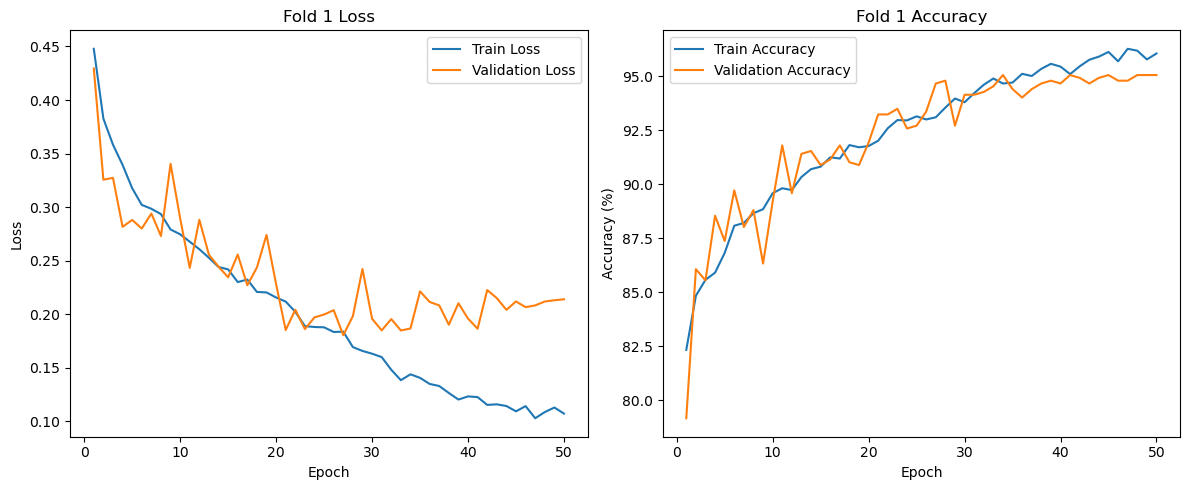

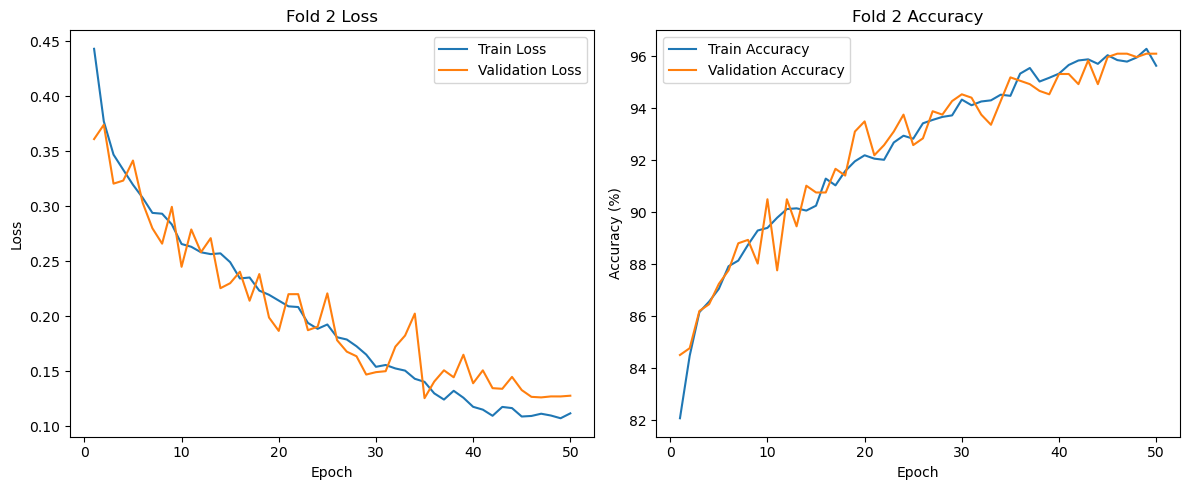

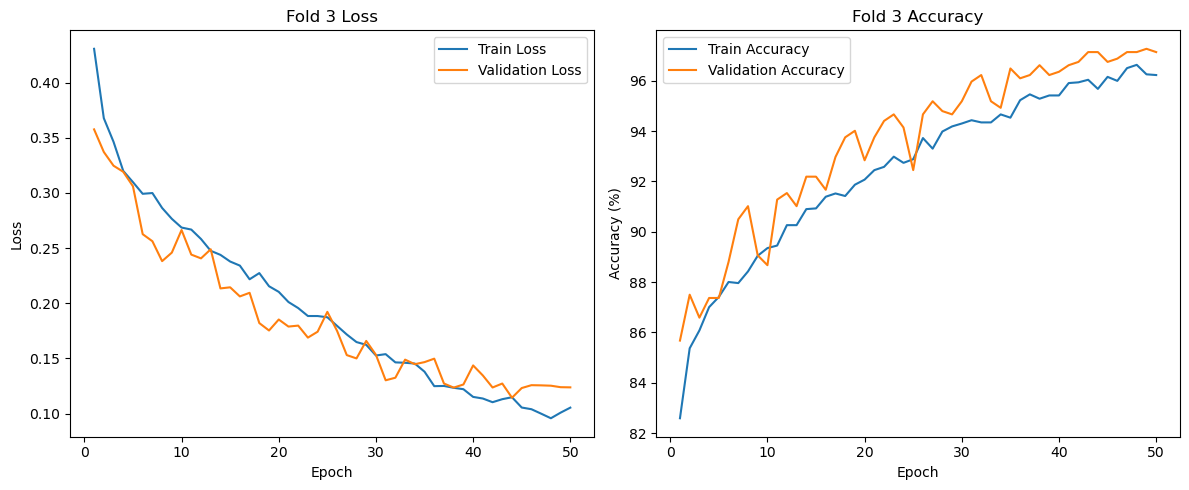

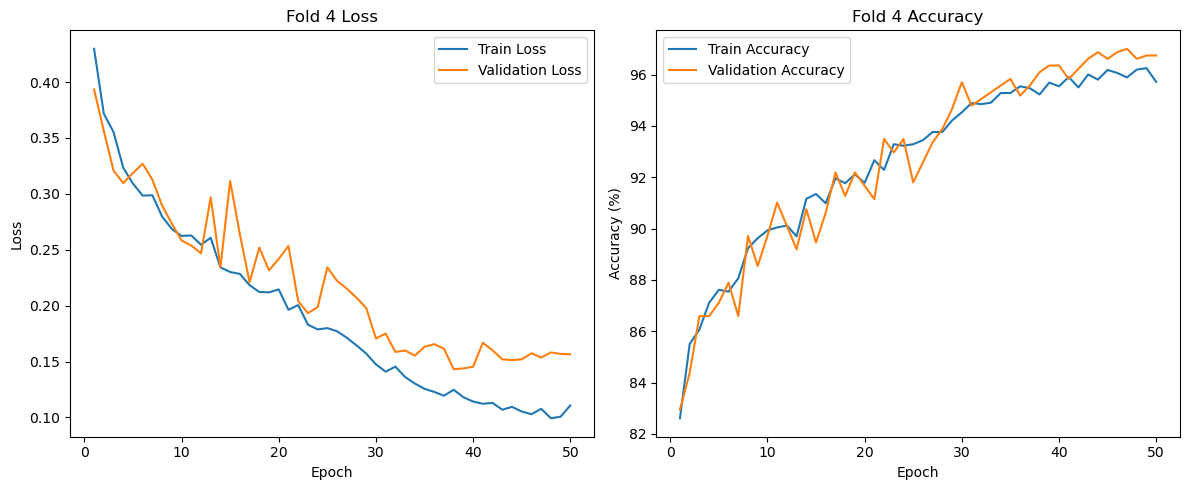

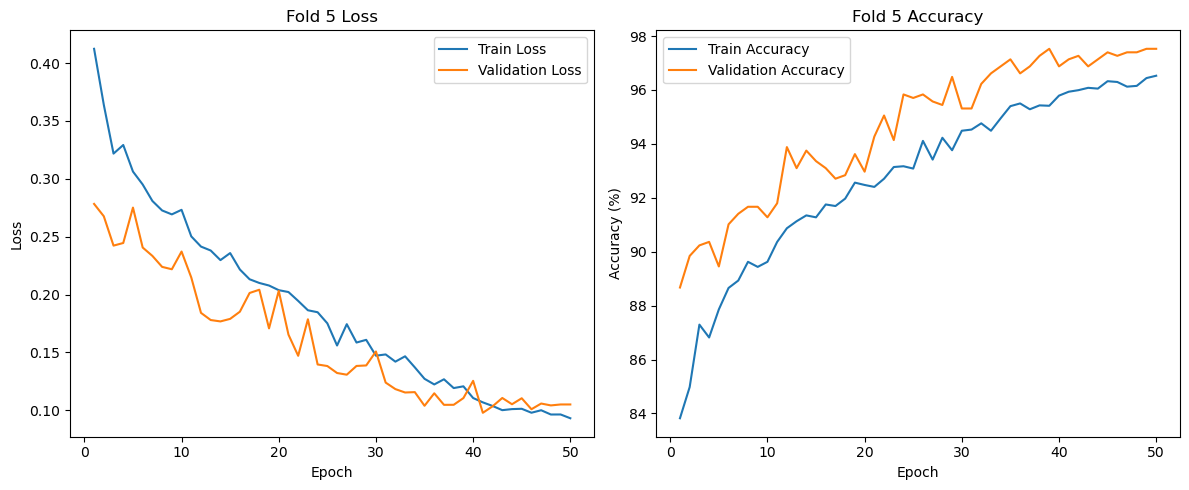

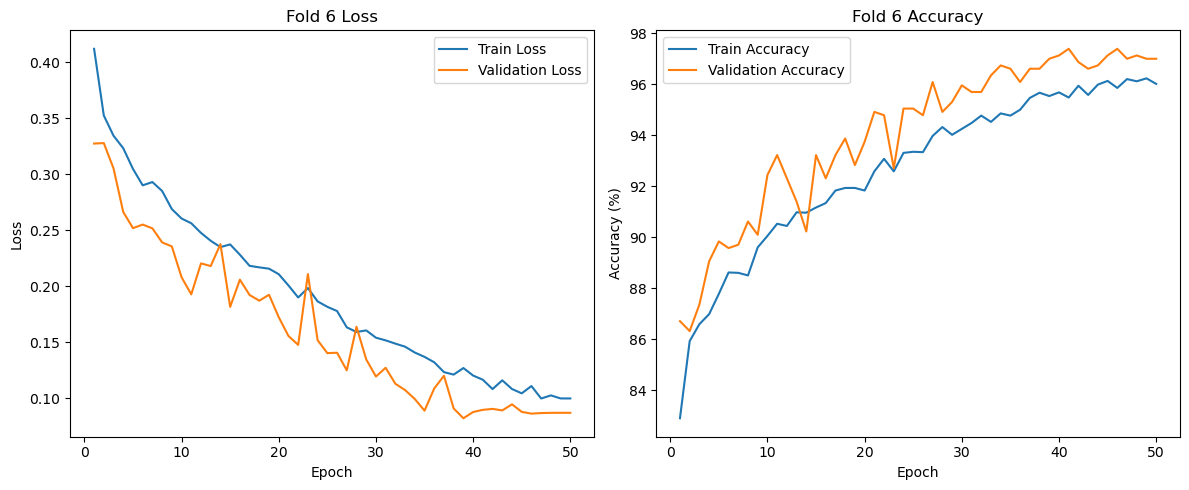

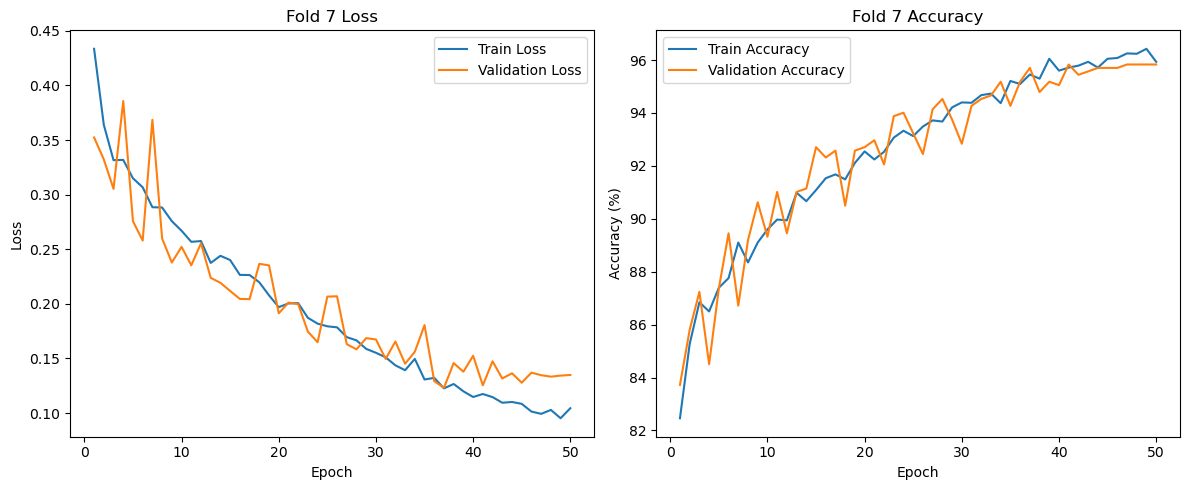

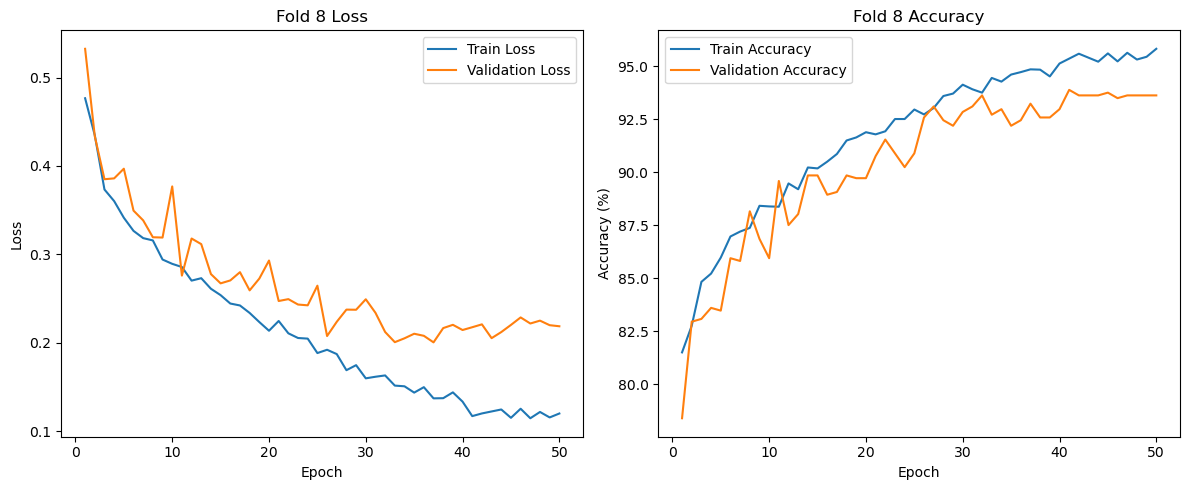

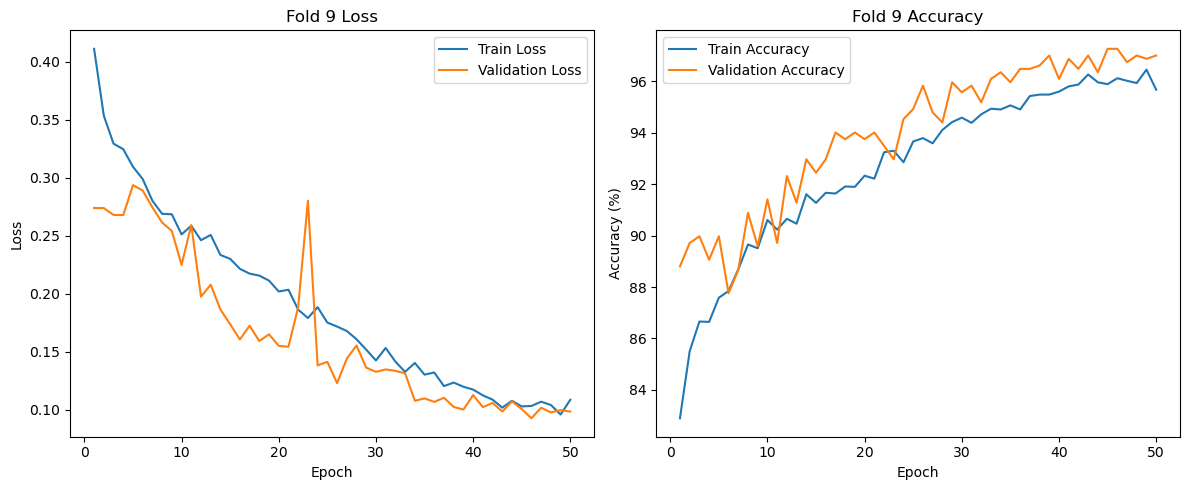

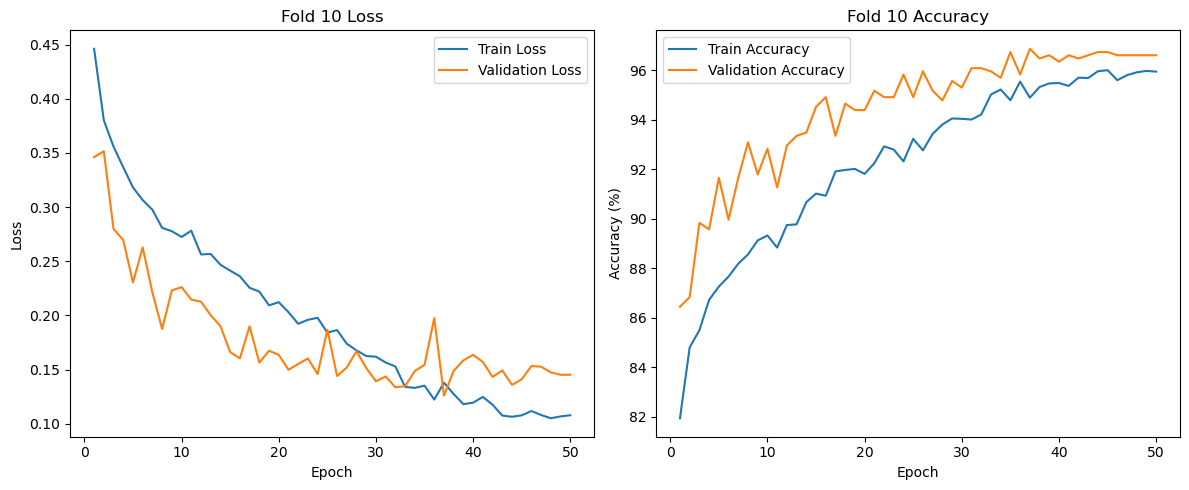


--- Cross-Validation Results ---
Average Best Train Loss: 0.1009
Average Best Val Loss: 0.1286
Average Best Train Accuracy: 96.29%
Average Best Val Accuracy: 96.42%
Ensemble Test Accuracy: 96.36%


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from timm import create_model
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import KFold
import numpy as np
import copy

# Custom Dataset with Error Handling
class Sports_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(img_dir))

        for label, class_name in enumerate(self.class_names):
            class_folder = os.path.join(img_dir, class_name)
            if not os.path.isdir(class_folder):
                continue  # Skip if not a directory
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    self.img_paths.append(img_path)
                    self.labels.append(label)
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, Image.DecompressionBombError) as e:
            print(f"Skipping corrupted image: {img_path}. Error: {e}")
            # Optionally, return a black image or another placeholder
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Hyperparameters
batch_size = 64  # Adjust based on GPU memory
num_workers = 4
num_epochs = 50
learning_rate = 2e-4
weight_decay = 1e-4  # L2 regularization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_splits = 10  # Number of folds for cross-validation
patience = 5  # Early stopping patience (optional if you decide to add it)

# Transforms with Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Validation/Test Transforms (without Augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Initialize Dataset and K-Fold
train_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=train_transform)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Initialize Lists to Store Metrics
fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []
best_models = []

# Cross-Validation Loop
for fold, (train_indices, val_indices) in enumerate(kf.split(train_dataset), 1):
    print(f"\n--- Fold {fold}/{n_splits} ---")
    
    # Subset the Dataset for Current Fold
    train_subset = Subset(train_dataset, train_indices)
    val_subset = Subset(Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=val_transform), val_indices)
    
    # DataLoaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    
    # Initialize Swin Transformer Model
    model = create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=len(train_dataset.class_names))
    model = model.to(device)
    
    # Optimizer and Scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    
    # Variables to Track Best Model
    best_val_loss = np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # Lists to Store Metrics for Current Fold
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # Training Loop
    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Fold {fold}, Epoch {epoch}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_train_loss = running_loss / len(train_subset)
        epoch_train_acc = 100.0 * correct / total
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)
        
        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        epoch_val_loss = val_running_loss / len(val_subset)
        epoch_val_acc = 100.0 * val_correct / val_total
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)
        
        print(f"Fold {fold}, Epoch {epoch}/{num_epochs}: "
              f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
              f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
        
        # Check for Best Model
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
        
        # Step the Scheduler
        scheduler.step()
    
    # Load Best Model Weights and Store
    model.load_state_dict(best_model_wts)
    best_models.append(copy.deepcopy(model))
    
    # Store Metrics for Current Fold
    fold_train_losses.append(train_losses)
    fold_val_losses.append(val_losses)
    fold_train_accuracies.append(train_accuracies)
    fold_val_accuracies.append(val_accuracies)
    
    print(f"--- Fold {fold} Completed: Best Val Acc: {epoch_val_acc:.2f}% ---\n")

# Test Evaluation with Model Ensembling
print("\n--- Testing Phase with Model Ensembling ---")
test_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/test', transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

ensemble_correct = 0
ensemble_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        
        # Initialize outputs tensor
        outputs = torch.zeros(images.size(0), len(train_dataset.class_names)).to(device)
        
        # Aggregate outputs from all models
        for model in best_models:
            model.eval()
            outputs += model(images)
        
        # Average the outputs
        outputs /= len(best_models)
        
        _, predicted = torch.max(outputs, 1)
        ensemble_total += labels.size(0)
        ensemble_correct += (predicted == labels).sum().item()

ensemble_test_accuracy = 100.0 * ensemble_correct / ensemble_total
print(f"\nEnsemble Test Accuracy: {ensemble_test_accuracy:.2f}%")

# Visualization of Training and Validation Metrics
for fold in range(n_splits):
    plt.figure(figsize=(12, 5))
    
    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(fold_train_losses[fold]) + 1), fold_train_losses[fold], label='Train Loss')
    plt.plot(range(1, len(fold_val_losses[fold]) + 1), fold_val_losses[fold], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1} Loss')
    plt.legend()
    
    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(fold_train_accuracies[fold]) + 1), fold_train_accuracies[fold], label='Train Accuracy')
    plt.plot(range(1, len(fold_val_accuracies[fold]) + 1), fold_val_accuracies[fold], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Fold {fold + 1} Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Optional: Aggregate Metrics Across All Folds
avg_train_loss = np.mean([np.min(loss) for loss in fold_train_losses])
avg_val_loss = np.mean([np.min(loss) for loss in fold_val_losses])
avg_train_acc = np.mean([np.max(acc) for acc in fold_train_accuracies])
avg_val_acc = np.mean([np.max(acc) for acc in fold_val_accuracies])

print(f"\n--- Cross-Validation Results ---")
print(f"Average Best Train Loss: {avg_train_loss:.4f}")
print(f"Average Best Val Loss: {avg_val_loss:.4f}")
print(f"Average Best Train Accuracy: {avg_train_acc:.2f}%")
print(f"Average Best Val Accuracy: {avg_val_acc:.2f}%")
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.2f}%")

# convnext_tiny

# maxvit_tiny_tf_224maxvit_tiny_tf_224

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from timm import create_model
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import copy

# Custom Dataset with Error Handling
class Sports_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(img_dir))

        for label, class_name in enumerate(self.class_names):
            class_folder = os.path.join(img_dir, class_name)
            if not os.path.isdir(class_folder):
                continue  # Skip if not a directory
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    self.img_paths.append(img_path)
                    self.labels.append(label)
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, Image.DecompressionBombError) as e:
            print(f"Skipping corrupted image: {img_path}. Error: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Hyperparameters
batch_size = 32  # Adjust based on GPU memory
num_workers = 2
num_epochs = 50
learning_rate = 1e-4
weight_decay = 1e-4  # L2 regularization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms with Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Validation/Test Transforms (without Augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Initialize Dataset
train_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=train_transform)
val_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/val', transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Initialize ConvNeXt-Tiny Model
model = create_model('maxvit_tiny_tf_224', pretrained=True, num_classes=len(train_dataset.class_names))
model = model.to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Variables to Track Best Model
best_val_loss = np.inf
best_model_wts = copy.deepcopy(model.state_dict())

# Training Loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = 100.0 * correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    epoch_val_loss = val_running_loss / len(val_dataset)
    epoch_val_acc = 100.0 * val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    
    print(f"Epoch {epoch}/{num_epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
    
    # Check for Best Model
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
    
    # Step the Scheduler
    scheduler.step()

# Load Best Model Weights
model.load_state_dict(best_model_wts)

# Test Evaluation
print("\n--- Testing Phase ---")
test_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/test', transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

Epoch 1/50: 100%|█████████████████████████████| 240/240 [01:00<00:00,  3.99it/s]


Epoch 1/50: Train Loss: 0.3652, Train Acc: 84.76% | Val Loss: 0.2761, Val Acc: 89.68%


Epoch 2/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.02it/s]


Epoch 2/50: Train Loss: 0.2860, Train Acc: 88.74% | Val Loss: 0.2383, Val Acc: 90.82%


Epoch 3/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.00it/s]


Epoch 3/50: Train Loss: 0.2548, Train Acc: 89.96% | Val Loss: 0.2506, Val Acc: 91.14%


Epoch 4/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.02it/s]


Epoch 4/50: Train Loss: 0.2218, Train Acc: 91.39% | Val Loss: 0.1776, Val Acc: 93.85%


Epoch 5/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.05it/s]


Epoch 5/50: Train Loss: 0.1995, Train Acc: 92.60% | Val Loss: 0.1644, Val Acc: 94.47%


Epoch 6/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.05it/s]


Epoch 6/50: Train Loss: 0.1896, Train Acc: 92.84% | Val Loss: 0.1713, Val Acc: 93.85%


Epoch 7/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.06it/s]


Epoch 7/50: Train Loss: 0.1816, Train Acc: 93.31% | Val Loss: 0.1681, Val Acc: 94.06%


Epoch 8/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.04it/s]


Epoch 8/50: Train Loss: 0.1673, Train Acc: 93.72% | Val Loss: 0.1550, Val Acc: 94.68%


Epoch 9/50: 100%|█████████████████████████████| 240/240 [00:59<00:00,  4.06it/s]


Epoch 9/50: Train Loss: 0.1515, Train Acc: 94.26% | Val Loss: 0.1097, Val Acc: 96.14%


Epoch 10/50: 100%|████████████████████████████| 240/240 [00:59<00:00,  4.06it/s]


Epoch 10/50: Train Loss: 0.1409, Train Acc: 94.53% | Val Loss: 0.1041, Val Acc: 96.35%


Epoch 11/50: 100%|████████████████████████████| 240/240 [00:59<00:00,  4.04it/s]


Epoch 11/50: Train Loss: 0.1360, Train Acc: 94.70% | Val Loss: 0.1076, Val Acc: 96.77%


Epoch 12/50: 100%|████████████████████████████| 240/240 [00:59<00:00,  4.03it/s]


Epoch 12/50: Train Loss: 0.1276, Train Acc: 95.34% | Val Loss: 0.1157, Val Acc: 96.35%


Epoch 13/50: 100%|████████████████████████████| 240/240 [00:59<00:00,  4.03it/s]


Epoch 13/50: Train Loss: 0.1258, Train Acc: 95.25% | Val Loss: 0.1369, Val Acc: 95.62%


Epoch 14/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.17it/s]


Epoch 14/50: Train Loss: 0.1179, Train Acc: 95.35% | Val Loss: 0.1232, Val Acc: 96.45%


Epoch 15/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 15/50: Train Loss: 0.1183, Train Acc: 95.47% | Val Loss: 0.0932, Val Acc: 96.98%


Epoch 16/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 16/50: Train Loss: 0.1083, Train Acc: 95.96% | Val Loss: 0.1003, Val Acc: 96.04%


Epoch 17/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 17/50: Train Loss: 0.0999, Train Acc: 95.98% | Val Loss: 0.1184, Val Acc: 96.04%


Epoch 18/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 18/50: Train Loss: 0.0968, Train Acc: 96.44% | Val Loss: 0.0788, Val Acc: 97.71%


Epoch 19/50: 100%|████████████████████████████| 240/240 [00:56<00:00,  4.21it/s]


Epoch 19/50: Train Loss: 0.0943, Train Acc: 96.30% | Val Loss: 0.0743, Val Acc: 97.29%


Epoch 20/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 20/50: Train Loss: 0.0873, Train Acc: 96.71% | Val Loss: 0.0614, Val Acc: 98.23%


Epoch 21/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 21/50: Train Loss: 0.0898, Train Acc: 96.55% | Val Loss: 0.1073, Val Acc: 96.56%


Epoch 22/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 22/50: Train Loss: 0.0831, Train Acc: 96.82% | Val Loss: 0.0855, Val Acc: 97.08%


Epoch 23/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 23/50: Train Loss: 0.0811, Train Acc: 96.95% | Val Loss: 0.0896, Val Acc: 97.71%


Epoch 24/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 24/50: Train Loss: 0.0754, Train Acc: 97.29% | Val Loss: 0.0800, Val Acc: 97.60%


Epoch 25/50: 100%|████████████████████████████| 240/240 [00:56<00:00,  4.21it/s]


Epoch 25/50: Train Loss: 0.0716, Train Acc: 97.21% | Val Loss: 0.0633, Val Acc: 98.02%


Epoch 26/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 26/50: Train Loss: 0.0753, Train Acc: 97.37% | Val Loss: 0.0701, Val Acc: 97.91%


Epoch 27/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 27/50: Train Loss: 0.0717, Train Acc: 97.55% | Val Loss: 0.0768, Val Acc: 98.02%


Epoch 28/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 28/50: Train Loss: 0.0655, Train Acc: 97.70% | Val Loss: 0.0688, Val Acc: 98.12%


Epoch 29/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 29/50: Train Loss: 0.0644, Train Acc: 97.54% | Val Loss: 0.0841, Val Acc: 97.39%


Epoch 30/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 30/50: Train Loss: 0.0627, Train Acc: 97.64% | Val Loss: 0.0879, Val Acc: 97.71%


Epoch 31/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 31/50: Train Loss: 0.0660, Train Acc: 97.27% | Val Loss: 0.0692, Val Acc: 98.44%


Epoch 32/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 32/50: Train Loss: 0.0589, Train Acc: 97.58% | Val Loss: 0.0618, Val Acc: 98.44%


Epoch 33/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 33/50: Train Loss: 0.0569, Train Acc: 97.89% | Val Loss: 0.0659, Val Acc: 98.54%


Epoch 34/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 34/50: Train Loss: 0.0600, Train Acc: 97.64% | Val Loss: 0.0611, Val Acc: 98.44%


Epoch 35/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 35/50: Train Loss: 0.0550, Train Acc: 97.62% | Val Loss: 0.0837, Val Acc: 98.23%


Epoch 36/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 36/50: Train Loss: 0.0518, Train Acc: 98.15% | Val Loss: 0.0585, Val Acc: 98.64%


Epoch 37/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 37/50: Train Loss: 0.0464, Train Acc: 98.18% | Val Loss: 0.0616, Val Acc: 98.44%


Epoch 38/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 38/50: Train Loss: 0.0510, Train Acc: 98.05% | Val Loss: 0.0525, Val Acc: 98.85%


Epoch 39/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 39/50: Train Loss: 0.0476, Train Acc: 98.12% | Val Loss: 0.0567, Val Acc: 98.85%


Epoch 40/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 40/50: Train Loss: 0.0524, Train Acc: 98.03% | Val Loss: 0.0523, Val Acc: 98.96%


Epoch 41/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 41/50: Train Loss: 0.0496, Train Acc: 98.22% | Val Loss: 0.0564, Val Acc: 98.96%


Epoch 42/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 42/50: Train Loss: 0.0443, Train Acc: 98.24% | Val Loss: 0.0601, Val Acc: 98.64%


Epoch 43/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 43/50: Train Loss: 0.0462, Train Acc: 98.33% | Val Loss: 0.0619, Val Acc: 98.64%


Epoch 44/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 44/50: Train Loss: 0.0546, Train Acc: 98.02% | Val Loss: 0.0558, Val Acc: 98.85%


Epoch 45/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 45/50: Train Loss: 0.0492, Train Acc: 98.06% | Val Loss: 0.0604, Val Acc: 98.64%


Epoch 46/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 46/50: Train Loss: 0.0476, Train Acc: 98.15% | Val Loss: 0.0631, Val Acc: 98.75%


Epoch 47/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.20it/s]


Epoch 47/50: Train Loss: 0.0473, Train Acc: 98.20% | Val Loss: 0.0609, Val Acc: 98.85%


Epoch 48/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.20it/s]


Epoch 48/50: Train Loss: 0.0422, Train Acc: 98.37% | Val Loss: 0.0621, Val Acc: 98.64%


Epoch 49/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 49/50: Train Loss: 0.0481, Train Acc: 98.10% | Val Loss: 0.0634, Val Acc: 98.64%


Epoch 50/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.21it/s]


Epoch 50/50: Train Loss: 0.0509, Train Acc: 98.12% | Val Loss: 0.0614, Val Acc: 98.64%

--- Testing Phase ---


Testing: 100%|██████████████████████████████████| 31/31 [00:02<00:00, 12.42it/s]


Test Accuracy: 97.82%


# beit

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from timm import create_model
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import copy

# Custom Dataset with Error Handling
class Sports_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(img_dir))

        for label, class_name in enumerate(self.class_names):
            class_folder = os.path.join(img_dir, class_name)
            if not os.path.isdir(class_folder):
                continue  # Skip if not a directory
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    self.img_paths.append(img_path)
                    self.labels.append(label)
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, Image.DecompressionBombError) as e:
            print(f"Skipping corrupted image: {img_path}. Error: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Hyperparameters
batch_size = 32  # Adjust based on GPU memory
num_workers = 2
num_epochs = 50
learning_rate = 1e-4
weight_decay = 1e-4  # L2 regularization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms with Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Validation/Test Transforms (without Augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Initialize Dataset
train_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=train_transform)
val_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/val', transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Initialize ConvNeXt-Tiny Model
model = create_model('beit_base_patch16_224', pretrained=True, num_classes=len(train_dataset.class_names))
model = model.to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Variables to Track Best Model
best_val_loss = np.inf
best_model_wts = copy.deepcopy(model.state_dict())

# Training Loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = 100.0 * correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    epoch_val_loss = val_running_loss / len(val_dataset)
    epoch_val_acc = 100.0 * val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    
    print(f"Epoch {epoch}/{num_epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
    
    # Check for Best Model
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
    
    # Step the Scheduler
    scheduler.step()

# Load Best Model Weights
model.load_state_dict(best_model_wts)

# Test Evaluation
print("\n--- Testing Phase ---")
test_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/test', transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

Epoch 1/50: 100%|█████████████████████████████| 240/240 [01:12<00:00,  3.31it/s]


Epoch 1/50: Train Loss: 0.4798, Train Acc: 81.70% | Val Loss: 0.4614, Val Acc: 81.75%


Epoch 2/50: 100%|█████████████████████████████| 240/240 [01:11<00:00,  3.35it/s]


Epoch 2/50: Train Loss: 0.4638, Train Acc: 81.63% | Val Loss: 0.4690, Val Acc: 81.75%


Epoch 3/50: 100%|█████████████████████████████| 240/240 [01:12<00:00,  3.32it/s]


Epoch 3/50: Train Loss: 0.4528, Train Acc: 81.69% | Val Loss: 0.4625, Val Acc: 81.75%


Epoch 4/50: 100%|█████████████████████████████| 240/240 [01:11<00:00,  3.36it/s]


Epoch 4/50: Train Loss: 0.4500, Train Acc: 81.77% | Val Loss: 0.4588, Val Acc: 78.42%


Epoch 5/50: 100%|█████████████████████████████| 240/240 [01:13<00:00,  3.26it/s]


Epoch 5/50: Train Loss: 0.4464, Train Acc: 81.99% | Val Loss: 0.4312, Val Acc: 82.17%


Epoch 6/50: 100%|█████████████████████████████| 240/240 [01:12<00:00,  3.32it/s]


Epoch 6/50: Train Loss: 0.4416, Train Acc: 82.16% | Val Loss: 0.4588, Val Acc: 82.90%


Epoch 7/50: 100%|█████████████████████████████| 240/240 [01:12<00:00,  3.32it/s]


Epoch 7/50: Train Loss: 0.4352, Train Acc: 82.32% | Val Loss: 0.4191, Val Acc: 83.21%


Epoch 8/50: 100%|█████████████████████████████| 240/240 [01:13<00:00,  3.26it/s]


Epoch 8/50: Train Loss: 0.4317, Train Acc: 82.88% | Val Loss: 0.4422, Val Acc: 81.86%


Epoch 9/50: 100%|█████████████████████████████| 240/240 [01:13<00:00,  3.28it/s]


Epoch 9/50: Train Loss: 0.4310, Train Acc: 83.01% | Val Loss: 0.4432, Val Acc: 81.75%


Epoch 10/50: 100%|████████████████████████████| 240/240 [01:11<00:00,  3.35it/s]


Epoch 10/50: Train Loss: 0.4323, Train Acc: 82.91% | Val Loss: 0.4152, Val Acc: 83.52%


Epoch 11/50: 100%|████████████████████████████| 240/240 [01:10<00:00,  3.40it/s]


Epoch 11/50: Train Loss: 0.4213, Train Acc: 83.32% | Val Loss: 0.3975, Val Acc: 84.15%


Epoch 12/50: 100%|████████████████████████████| 240/240 [01:21<00:00,  2.95it/s]


Epoch 12/50: Train Loss: 0.4123, Train Acc: 83.59% | Val Loss: 0.4189, Val Acc: 82.79%


Epoch 13/50: 100%|████████████████████████████| 240/240 [01:13<00:00,  3.25it/s]


Epoch 13/50: Train Loss: 0.4083, Train Acc: 83.33% | Val Loss: 0.3707, Val Acc: 85.19%


Epoch 14/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 14/50: Train Loss: 0.4018, Train Acc: 83.90% | Val Loss: 0.3677, Val Acc: 84.57%


Epoch 15/50: 100%|████████████████████████████| 240/240 [01:11<00:00,  3.35it/s]


Epoch 15/50: Train Loss: 0.3913, Train Acc: 84.28% | Val Loss: 0.3861, Val Acc: 84.36%


Epoch 16/50: 100%|████████████████████████████| 240/240 [01:11<00:00,  3.35it/s]


Epoch 16/50: Train Loss: 0.3865, Train Acc: 84.58% | Val Loss: 0.3557, Val Acc: 84.78%


Epoch 17/50: 100%|████████████████████████████| 240/240 [01:12<00:00,  3.30it/s]


Epoch 17/50: Train Loss: 0.3766, Train Acc: 84.72% | Val Loss: 0.3416, Val Acc: 85.19%


Epoch 18/50: 100%|████████████████████████████| 240/240 [01:14<00:00,  3.22it/s]


Epoch 18/50: Train Loss: 0.3774, Train Acc: 84.59% | Val Loss: 0.3653, Val Acc: 84.78%


Epoch 19/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.98it/s]


Epoch 19/50: Train Loss: 0.3672, Train Acc: 85.06% | Val Loss: 0.3465, Val Acc: 85.61%


Epoch 20/50: 100%|████████████████████████████| 240/240 [01:11<00:00,  3.36it/s]


Epoch 20/50: Train Loss: 0.3663, Train Acc: 85.05% | Val Loss: 0.3306, Val Acc: 86.86%


Epoch 21/50: 100%|████████████████████████████| 240/240 [01:09<00:00,  3.43it/s]


Epoch 21/50: Train Loss: 0.3574, Train Acc: 85.62% | Val Loss: 0.3254, Val Acc: 86.03%


Epoch 22/50: 100%|████████████████████████████| 240/240 [01:11<00:00,  3.37it/s]


Epoch 22/50: Train Loss: 0.3500, Train Acc: 85.78% | Val Loss: 0.3187, Val Acc: 86.76%


Epoch 23/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.97it/s]


Epoch 23/50: Train Loss: 0.3419, Train Acc: 85.96% | Val Loss: 0.3123, Val Acc: 87.07%


Epoch 24/50: 100%|████████████████████████████| 240/240 [01:19<00:00,  3.03it/s]


Epoch 24/50: Train Loss: 0.3397, Train Acc: 86.40% | Val Loss: 0.3119, Val Acc: 86.97%


Epoch 25/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.99it/s]


Epoch 25/50: Train Loss: 0.3297, Train Acc: 86.51% | Val Loss: 0.3087, Val Acc: 88.22%


Epoch 26/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  3.00it/s]


Epoch 26/50: Train Loss: 0.3284, Train Acc: 86.53% | Val Loss: 0.3091, Val Acc: 86.86%


Epoch 27/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  3.00it/s]


Epoch 27/50: Train Loss: 0.3135, Train Acc: 86.96% | Val Loss: 0.3161, Val Acc: 86.55%


Epoch 28/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.99it/s]


Epoch 28/50: Train Loss: 0.3163, Train Acc: 86.96% | Val Loss: 0.2898, Val Acc: 88.63%


Epoch 29/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.99it/s]


Epoch 29/50: Train Loss: 0.3093, Train Acc: 87.15% | Val Loss: 0.2924, Val Acc: 87.59%


Epoch 30/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.99it/s]


Epoch 30/50: Train Loss: 0.3079, Train Acc: 87.45% | Val Loss: 0.3006, Val Acc: 88.01%


Epoch 31/50: 100%|████████████████████████████| 240/240 [01:19<00:00,  3.00it/s]


Epoch 31/50: Train Loss: 0.2912, Train Acc: 88.23% | Val Loss: 0.2859, Val Acc: 87.70%


Epoch 32/50: 100%|████████████████████████████| 240/240 [01:19<00:00,  3.00it/s]


Epoch 32/50: Train Loss: 0.2894, Train Acc: 88.31% | Val Loss: 0.2798, Val Acc: 88.95%


Epoch 33/50: 100%|████████████████████████████| 240/240 [01:17<00:00,  3.12it/s]


Epoch 33/50: Train Loss: 0.2812, Train Acc: 88.28% | Val Loss: 0.2639, Val Acc: 89.26%


Epoch 34/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 34/50: Train Loss: 0.2804, Train Acc: 88.94% | Val Loss: 0.2636, Val Acc: 89.57%


Epoch 35/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 35/50: Train Loss: 0.2708, Train Acc: 89.13% | Val Loss: 0.2610, Val Acc: 89.68%


Epoch 36/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 36/50: Train Loss: 0.2735, Train Acc: 89.28% | Val Loss: 0.2546, Val Acc: 89.16%


Epoch 37/50: 100%|████████████████████████████| 240/240 [01:20<00:00,  2.98it/s]


Epoch 37/50: Train Loss: 0.2653, Train Acc: 89.39% | Val Loss: 0.2405, Val Acc: 90.62%


Epoch 38/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 38/50: Train Loss: 0.2542, Train Acc: 90.25% | Val Loss: 0.2439, Val Acc: 90.82%


Epoch 39/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 39/50: Train Loss: 0.2442, Train Acc: 90.18% | Val Loss: 0.2443, Val Acc: 90.51%


Epoch 40/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 40/50: Train Loss: 0.2466, Train Acc: 90.74% | Val Loss: 0.2403, Val Acc: 90.30%


Epoch 41/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 41/50: Train Loss: 0.2474, Train Acc: 90.23% | Val Loss: 0.2362, Val Acc: 90.82%


Epoch 42/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 42/50: Train Loss: 0.2413, Train Acc: 90.85% | Val Loss: 0.2330, Val Acc: 90.72%


Epoch 43/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 43/50: Train Loss: 0.2274, Train Acc: 91.35% | Val Loss: 0.2311, Val Acc: 90.82%


Epoch 44/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 44/50: Train Loss: 0.2336, Train Acc: 90.90% | Val Loss: 0.2316, Val Acc: 90.82%


Epoch 45/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 45/50: Train Loss: 0.2268, Train Acc: 91.21% | Val Loss: 0.2306, Val Acc: 90.62%


Epoch 46/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 46/50: Train Loss: 0.2402, Train Acc: 90.51% | Val Loss: 0.2323, Val Acc: 91.03%


Epoch 47/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 47/50: Train Loss: 0.2230, Train Acc: 91.20% | Val Loss: 0.2282, Val Acc: 90.82%


Epoch 48/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 48/50: Train Loss: 0.2233, Train Acc: 91.26% | Val Loss: 0.2282, Val Acc: 90.62%


Epoch 49/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 49/50: Train Loss: 0.2228, Train Acc: 91.30% | Val Loss: 0.2294, Val Acc: 90.82%


Epoch 50/50: 100%|████████████████████████████| 240/240 [01:16<00:00,  3.15it/s]


Epoch 50/50: Train Loss: 0.2276, Train Acc: 91.26% | Val Loss: 0.2295, Val Acc: 90.82%

--- Testing Phase ---


Testing: 100%|██████████████████████████████████| 31/31 [00:03<00:00,  9.34it/s]


Test Accuracy: 89.71%


# NEXT_VIT

In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from timm import create_model
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import copy

# Custom Dataset with Error Handling
class Sports_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(img_dir))

        for label, class_name in enumerate(self.class_names):
            class_folder = os.path.join(img_dir, class_name)
            if not os.path.isdir(class_folder):
                continue  # Skip if not a directory
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    self.img_paths.append(img_path)
                    self.labels.append(label)
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, Image.DecompressionBombError) as e:
            print(f"Skipping corrupted image: {img_path}. Error: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Hyperparameters
batch_size = 32  # Adjust based on GPU memory
num_workers = 2
num_epochs = 50
learning_rate = 1e-4
weight_decay = 1e-4  # L2 regularization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms with Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Validation/Test Transforms (without Augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Initialize Dataset
train_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=train_transform)
val_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/val', transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Initialize ConvNeXt-Tiny Model
model = create_model('nextvit_small', pretrained=True, num_classes=len(train_dataset.class_names))
model = model.to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Variables to Track Best Model
best_val_loss = np.inf
best_model_wts = copy.deepcopy(model.state_dict())

# Training Loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = 100.0 * correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    epoch_val_loss = val_running_loss / len(val_dataset)
    epoch_val_acc = 100.0 * val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    
    print(f"Epoch {epoch}/{num_epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
    
    # Check for Best Model
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
    
    # Step the Scheduler
    scheduler.step()

# Load Best Model Weights
model.load_state_dict(best_model_wts)

# Test Evaluation
print("\n--- Testing Phase ---")
test_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/test', transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

Epoch 1/50: 100%|█████████████████████████████| 240/240 [00:49<00:00,  4.88it/s]


Epoch 1/50: Train Loss: 0.5495, Train Acc: 73.73% | Val Loss: 0.4832, Val Acc: 80.50%


Epoch 2/50: 100%|█████████████████████████████| 240/240 [00:45<00:00,  5.30it/s]


Epoch 2/50: Train Loss: 0.4135, Train Acc: 84.24% | Val Loss: 0.2869, Val Acc: 88.53%


Epoch 3/50: 100%|█████████████████████████████| 240/240 [00:45<00:00,  5.29it/s]


Epoch 3/50: Train Loss: 0.3385, Train Acc: 87.55% | Val Loss: 0.2760, Val Acc: 90.09%


Epoch 4/50: 100%|█████████████████████████████| 240/240 [00:45<00:00,  5.25it/s]


Epoch 4/50: Train Loss: 0.3052, Train Acc: 88.08% | Val Loss: 0.2596, Val Acc: 89.99%


Epoch 5/50: 100%|█████████████████████████████| 240/240 [00:46<00:00,  5.15it/s]


Epoch 5/50: Train Loss: 0.2846, Train Acc: 88.84% | Val Loss: 0.2494, Val Acc: 89.89%


Epoch 6/50: 100%|█████████████████████████████| 240/240 [00:46<00:00,  5.15it/s]


Epoch 6/50: Train Loss: 0.2639, Train Acc: 89.63% | Val Loss: 0.2110, Val Acc: 91.87%


Epoch 7/50: 100%|█████████████████████████████| 240/240 [00:47<00:00,  5.11it/s]


Epoch 7/50: Train Loss: 0.2591, Train Acc: 89.61% | Val Loss: 0.2202, Val Acc: 91.35%


Epoch 8/50: 100%|█████████████████████████████| 240/240 [00:45<00:00,  5.28it/s]


Epoch 8/50: Train Loss: 0.2407, Train Acc: 91.11% | Val Loss: 0.1844, Val Acc: 93.33%


Epoch 9/50: 100%|█████████████████████████████| 240/240 [00:48<00:00,  4.99it/s]


Epoch 9/50: Train Loss: 0.2369, Train Acc: 91.42% | Val Loss: 0.1917, Val Acc: 92.91%


Epoch 10/50: 100%|████████████████████████████| 240/240 [00:46<00:00,  5.13it/s]


Epoch 10/50: Train Loss: 0.2253, Train Acc: 91.69% | Val Loss: 0.2741, Val Acc: 91.03%


Epoch 11/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.23it/s]


Epoch 11/50: Train Loss: 0.2257, Train Acc: 91.20% | Val Loss: 0.1781, Val Acc: 93.33%


Epoch 12/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.23it/s]


Epoch 12/50: Train Loss: 0.2074, Train Acc: 92.43% | Val Loss: 0.1846, Val Acc: 93.01%


Epoch 13/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.27it/s]


Epoch 13/50: Train Loss: 0.2033, Train Acc: 92.63% | Val Loss: 0.1469, Val Acc: 94.79%


Epoch 14/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.28it/s]


Epoch 14/50: Train Loss: 0.1923, Train Acc: 92.89% | Val Loss: 0.1719, Val Acc: 93.33%


Epoch 15/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.24it/s]


Epoch 15/50: Train Loss: 0.1869, Train Acc: 93.06% | Val Loss: 0.1827, Val Acc: 93.33%


Epoch 16/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.30it/s]


Epoch 16/50: Train Loss: 0.1791, Train Acc: 93.57% | Val Loss: 0.1640, Val Acc: 93.74%


Epoch 17/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.29it/s]


Epoch 17/50: Train Loss: 0.1779, Train Acc: 93.55% | Val Loss: 0.1624, Val Acc: 94.06%


Epoch 18/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.30it/s]


Epoch 18/50: Train Loss: 0.1637, Train Acc: 94.11% | Val Loss: 0.1351, Val Acc: 95.31%


Epoch 19/50: 100%|████████████████████████████| 240/240 [00:44<00:00,  5.34it/s]


Epoch 19/50: Train Loss: 0.1647, Train Acc: 94.05% | Val Loss: 0.1323, Val Acc: 95.52%


Epoch 20/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.27it/s]


Epoch 20/50: Train Loss: 0.1559, Train Acc: 94.61% | Val Loss: 0.1140, Val Acc: 96.25%


Epoch 21/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.29it/s]


Epoch 21/50: Train Loss: 0.1560, Train Acc: 94.14% | Val Loss: 0.1249, Val Acc: 95.31%


Epoch 22/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.27it/s]


Epoch 22/50: Train Loss: 0.1504, Train Acc: 94.41% | Val Loss: 0.1440, Val Acc: 95.41%


Epoch 23/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.24it/s]


Epoch 23/50: Train Loss: 0.1377, Train Acc: 95.16% | Val Loss: 0.1312, Val Acc: 96.04%


Epoch 24/50: 100%|████████████████████████████| 240/240 [00:46<00:00,  5.20it/s]


Epoch 24/50: Train Loss: 0.1424, Train Acc: 94.49% | Val Loss: 0.1164, Val Acc: 96.25%


Epoch 25/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.26it/s]


Epoch 25/50: Train Loss: 0.1297, Train Acc: 95.31% | Val Loss: 0.1104, Val Acc: 96.25%


Epoch 26/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.24it/s]


Epoch 26/50: Train Loss: 0.1264, Train Acc: 95.52% | Val Loss: 0.1168, Val Acc: 96.04%


Epoch 27/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.24it/s]


Epoch 27/50: Train Loss: 0.1155, Train Acc: 95.79% | Val Loss: 0.0987, Val Acc: 96.04%


Epoch 28/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.31it/s]


Epoch 28/50: Train Loss: 0.1163, Train Acc: 95.70% | Val Loss: 0.1244, Val Acc: 95.93%


Epoch 29/50: 100%|████████████████████████████| 240/240 [00:45<00:00,  5.32it/s]


Epoch 29/50: Train Loss: 0.1082, Train Acc: 95.99% | Val Loss: 0.0973, Val Acc: 96.77%


Epoch 30/50: 100%|████████████████████████████| 240/240 [00:49<00:00,  4.81it/s]


Epoch 30/50: Train Loss: 0.1073, Train Acc: 96.00% | Val Loss: 0.0966, Val Acc: 96.66%


Epoch 31/50: 100%|████████████████████████████| 240/240 [02:54<00:00,  1.37it/s]


Epoch 31/50: Train Loss: 0.1004, Train Acc: 96.28% | Val Loss: 0.0820, Val Acc: 97.08%


Epoch 32/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.44it/s]


Epoch 32/50: Train Loss: 0.1003, Train Acc: 96.28% | Val Loss: 0.0775, Val Acc: 97.39%


Epoch 33/50: 100%|████████████████████████████| 240/240 [00:47<00:00,  5.03it/s]


Epoch 33/50: Train Loss: 0.0926, Train Acc: 96.54% | Val Loss: 0.0885, Val Acc: 97.08%


Epoch 34/50: 100%|████████████████████████████| 240/240 [00:47<00:00,  5.10it/s]


Epoch 34/50: Train Loss: 0.0906, Train Acc: 96.63% | Val Loss: 0.0987, Val Acc: 96.66%


Epoch 35/50: 100%|████████████████████████████| 240/240 [00:46<00:00,  5.18it/s]


Epoch 35/50: Train Loss: 0.0931, Train Acc: 96.71% | Val Loss: 0.0938, Val Acc: 96.98%


Epoch 36/50: 100%|████████████████████████████| 240/240 [00:36<00:00,  6.61it/s]


Epoch 36/50: Train Loss: 0.0855, Train Acc: 96.87% | Val Loss: 0.0913, Val Acc: 97.29%


Epoch 37/50: 100%|████████████████████████████| 240/240 [00:35<00:00,  6.67it/s]


Epoch 37/50: Train Loss: 0.0893, Train Acc: 96.52% | Val Loss: 0.0774, Val Acc: 97.71%


Epoch 38/50: 100%|████████████████████████████| 240/240 [00:35<00:00,  6.78it/s]


Epoch 38/50: Train Loss: 0.0830, Train Acc: 96.87% | Val Loss: 0.0798, Val Acc: 97.71%


Epoch 39/50: 100%|████████████████████████████| 240/240 [00:35<00:00,  6.84it/s]


Epoch 39/50: Train Loss: 0.0804, Train Acc: 97.21% | Val Loss: 0.0924, Val Acc: 97.39%


Epoch 40/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 40/50: Train Loss: 0.0695, Train Acc: 97.30% | Val Loss: 0.0822, Val Acc: 97.50%


Epoch 41/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.88it/s]


Epoch 41/50: Train Loss: 0.0696, Train Acc: 97.41% | Val Loss: 0.0754, Val Acc: 97.50%


Epoch 42/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 42/50: Train Loss: 0.0758, Train Acc: 97.30% | Val Loss: 0.0797, Val Acc: 97.50%


Epoch 43/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 43/50: Train Loss: 0.0773, Train Acc: 97.06% | Val Loss: 0.0749, Val Acc: 98.12%


Epoch 44/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 44/50: Train Loss: 0.0744, Train Acc: 97.53% | Val Loss: 0.0699, Val Acc: 98.02%


Epoch 45/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.88it/s]


Epoch 45/50: Train Loss: 0.0676, Train Acc: 97.54% | Val Loss: 0.0712, Val Acc: 98.12%


Epoch 46/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 46/50: Train Loss: 0.0688, Train Acc: 97.32% | Val Loss: 0.0711, Val Acc: 98.02%


Epoch 47/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 47/50: Train Loss: 0.0694, Train Acc: 97.53% | Val Loss: 0.0676, Val Acc: 98.02%


Epoch 48/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.87it/s]


Epoch 48/50: Train Loss: 0.0673, Train Acc: 97.46% | Val Loss: 0.0683, Val Acc: 98.02%


Epoch 49/50: 100%|████████████████████████████| 240/240 [00:34<00:00,  6.86it/s]


Epoch 49/50: Train Loss: 0.0659, Train Acc: 97.50% | Val Loss: 0.0693, Val Acc: 98.02%


Epoch 50/50: 100%|████████████████████████████| 240/240 [00:35<00:00,  6.75it/s]


Epoch 50/50: Train Loss: 0.0633, Train Acc: 97.60% | Val Loss: 0.0697, Val Acc: 98.02%

--- Testing Phase ---


Testing: 100%|██████████████████████████████████| 31/31 [00:01<00:00, 16.15it/s]


Test Accuracy: 97.71%


# CONVNEXT_TINY

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from timm import create_model
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import copy

# Custom Dataset with Error Handling
class Sports_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(img_dir))

        for label, class_name in enumerate(self.class_names):
            class_folder = os.path.join(img_dir, class_name)
            if not os.path.isdir(class_folder):
                continue  # Skip if not a directory
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    self.img_paths.append(img_path)
                    self.labels.append(label)
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, Image.DecompressionBombError) as e:
            print(f"Skipping corrupted image: {img_path}. Error: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Hyperparameters
batch_size = 32  # Adjust based on GPU memory
num_workers = 2
num_epochs = 50
learning_rate = 1e-4
weight_decay = 1e-4  # L2 regularization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms with Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Validation/Test Transforms (without Augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Initialize Dataset
train_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/train', transform=train_transform)
val_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/val', transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Initialize ConvNeXt-Tiny Model
model = create_model('convnext_tiny', pretrained=True, num_classes=len(train_dataset.class_names))
model = model.to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Variables to Track Best Model
best_val_loss = np.inf
best_model_wts = copy.deepcopy(model.state_dict())

# Training Loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = 100.0 * correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    epoch_val_loss = val_running_loss / len(val_dataset)
    epoch_val_acc = 100.0 * val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    
    print(f"Epoch {epoch}/{num_epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
    
    # Check for Best Model
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
    
    # Step the Scheduler
    scheduler.step()

# Load Best Model Weights
model.load_state_dict(best_model_wts)

# Test Evaluation
print("\n--- Testing Phase ---")
test_dataset = Sports_Dataset('/home/dhrubo/Downloads/FracAtlas/OUTPUT/test', transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

Epoch 1/50: 100%|█████████████████████████████| 240/240 [00:53<00:00,  4.47it/s]


Epoch 1/50: Train Loss: 0.5038, Train Acc: 81.40% | Val Loss: 0.4769, Val Acc: 81.75%


Epoch 2/50: 100%|█████████████████████████████| 240/240 [00:58<00:00,  4.09it/s]


Epoch 2/50: Train Loss: 0.4365, Train Acc: 82.98% | Val Loss: 0.4363, Val Acc: 81.75%


Epoch 3/50: 100%|█████████████████████████████| 240/240 [01:00<00:00,  3.94it/s]


Epoch 3/50: Train Loss: 0.3728, Train Acc: 84.88% | Val Loss: 0.3068, Val Acc: 87.28%


Epoch 4/50: 100%|█████████████████████████████| 240/240 [01:01<00:00,  3.92it/s]


Epoch 4/50: Train Loss: 0.3301, Train Acc: 87.02% | Val Loss: 0.2976, Val Acc: 88.22%


Epoch 5/50: 100%|█████████████████████████████| 240/240 [01:00<00:00,  3.96it/s]


Epoch 5/50: Train Loss: 0.3034, Train Acc: 88.02% | Val Loss: 0.2473, Val Acc: 88.95%


Epoch 6/50: 100%|█████████████████████████████| 240/240 [01:00<00:00,  3.95it/s]


Epoch 6/50: Train Loss: 0.2766, Train Acc: 88.93% | Val Loss: 0.2441, Val Acc: 90.30%


Epoch 7/50: 100%|█████████████████████████████| 240/240 [01:00<00:00,  3.95it/s]


Epoch 7/50: Train Loss: 0.2624, Train Acc: 89.96% | Val Loss: 0.2497, Val Acc: 90.93%


Epoch 8/50: 100%|█████████████████████████████| 240/240 [01:01<00:00,  3.93it/s]


Epoch 8/50: Train Loss: 0.2486, Train Acc: 90.32% | Val Loss: 0.2193, Val Acc: 92.28%


Epoch 9/50: 100%|█████████████████████████████| 240/240 [01:01<00:00,  3.93it/s]


Epoch 9/50: Train Loss: 0.2454, Train Acc: 90.66% | Val Loss: 0.2237, Val Acc: 91.03%


Epoch 10/50: 100%|████████████████████████████| 240/240 [01:01<00:00,  3.93it/s]


Epoch 10/50: Train Loss: 0.2275, Train Acc: 91.48% | Val Loss: 0.2135, Val Acc: 91.97%


Epoch 11/50: 100%|████████████████████████████| 240/240 [01:00<00:00,  3.95it/s]


Epoch 11/50: Train Loss: 0.2150, Train Acc: 91.99% | Val Loss: 0.1989, Val Acc: 92.60%


Epoch 12/50: 100%|████████████████████████████| 240/240 [01:00<00:00,  3.94it/s]


Epoch 12/50: Train Loss: 0.2131, Train Acc: 92.21% | Val Loss: 0.1904, Val Acc: 92.70%


Epoch 13/50: 100%|████████████████████████████| 240/240 [01:01<00:00,  3.92it/s]


Epoch 13/50: Train Loss: 0.2038, Train Acc: 92.66% | Val Loss: 0.1643, Val Acc: 94.37%


Epoch 14/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.61it/s]


Epoch 14/50: Train Loss: 0.1857, Train Acc: 93.38% | Val Loss: 0.1337, Val Acc: 95.31%


Epoch 15/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 15/50: Train Loss: 0.1807, Train Acc: 93.20% | Val Loss: 0.1548, Val Acc: 94.68%


Epoch 16/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 16/50: Train Loss: 0.1744, Train Acc: 93.65% | Val Loss: 0.1655, Val Acc: 93.85%


Epoch 17/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 17/50: Train Loss: 0.1750, Train Acc: 93.48% | Val Loss: 0.1499, Val Acc: 94.79%


Epoch 18/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 18/50: Train Loss: 0.1567, Train Acc: 94.20% | Val Loss: 0.2159, Val Acc: 93.12%


Epoch 19/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 19/50: Train Loss: 0.1594, Train Acc: 94.06% | Val Loss: 0.1386, Val Acc: 95.31%


Epoch 20/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 20/50: Train Loss: 0.1550, Train Acc: 94.54% | Val Loss: 0.1426, Val Acc: 94.68%


Epoch 21/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 21/50: Train Loss: 0.1385, Train Acc: 94.71% | Val Loss: 0.1370, Val Acc: 95.20%


Epoch 22/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 22/50: Train Loss: 0.1363, Train Acc: 95.00% | Val Loss: 0.1358, Val Acc: 94.99%


Epoch 23/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 23/50: Train Loss: 0.1313, Train Acc: 95.19% | Val Loss: 0.1109, Val Acc: 95.72%


Epoch 24/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 24/50: Train Loss: 0.1282, Train Acc: 95.13% | Val Loss: 0.1139, Val Acc: 96.56%


Epoch 25/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 25/50: Train Loss: 0.1173, Train Acc: 95.85% | Val Loss: 0.1270, Val Acc: 95.83%


Epoch 26/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 26/50: Train Loss: 0.1173, Train Acc: 95.57% | Val Loss: 0.0922, Val Acc: 96.87%


Epoch 27/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 27/50: Train Loss: 0.1068, Train Acc: 95.88% | Val Loss: 0.1228, Val Acc: 95.83%


Epoch 28/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 28/50: Train Loss: 0.0985, Train Acc: 96.39% | Val Loss: 0.1365, Val Acc: 95.52%


Epoch 29/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 29/50: Train Loss: 0.0969, Train Acc: 96.30% | Val Loss: 0.1033, Val Acc: 96.77%


Epoch 30/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 30/50: Train Loss: 0.1049, Train Acc: 96.20% | Val Loss: 0.1073, Val Acc: 96.04%


Epoch 31/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 31/50: Train Loss: 0.0878, Train Acc: 96.84% | Val Loss: 0.0978, Val Acc: 96.98%


Epoch 32/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 32/50: Train Loss: 0.0913, Train Acc: 96.54% | Val Loss: 0.0850, Val Acc: 97.29%


Epoch 33/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 33/50: Train Loss: 0.0864, Train Acc: 96.80% | Val Loss: 0.0935, Val Acc: 97.18%


Epoch 34/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 34/50: Train Loss: 0.0825, Train Acc: 97.06% | Val Loss: 0.0951, Val Acc: 97.18%


Epoch 35/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.64it/s]


Epoch 35/50: Train Loss: 0.0775, Train Acc: 97.04% | Val Loss: 0.1031, Val Acc: 96.87%


Epoch 36/50: 100%|████████████████████████████| 240/240 [00:42<00:00,  5.63it/s]


Epoch 36/50: Train Loss: 0.0753, Train Acc: 97.16% | Val Loss: 0.0889, Val Acc: 97.60%


Epoch 37/50: 100%|████████████████████████████| 240/240 [01:00<00:00,  3.98it/s]


Epoch 37/50: Train Loss: 0.0686, Train Acc: 97.47% | Val Loss: 0.0741, Val Acc: 97.81%


Epoch 38/50: 100%|████████████████████████████| 240/240 [00:59<00:00,  4.04it/s]


Epoch 38/50: Train Loss: 0.0654, Train Acc: 97.63% | Val Loss: 0.0991, Val Acc: 97.29%


Epoch 39/50: 100%|████████████████████████████| 240/240 [00:55<00:00,  4.33it/s]


Epoch 39/50: Train Loss: 0.0721, Train Acc: 97.28% | Val Loss: 0.0856, Val Acc: 97.39%


Epoch 40/50: 100%|████████████████████████████| 240/240 [00:56<00:00,  4.26it/s]


Epoch 40/50: Train Loss: 0.0669, Train Acc: 97.49% | Val Loss: 0.0745, Val Acc: 97.91%


Epoch 41/50: 100%|████████████████████████████| 240/240 [00:57<00:00,  4.15it/s]


Epoch 41/50: Train Loss: 0.0725, Train Acc: 97.21% | Val Loss: 0.0748, Val Acc: 98.23%


Epoch 42/50: 100%|████████████████████████████| 240/240 [00:56<00:00,  4.21it/s]


Epoch 42/50: Train Loss: 0.0557, Train Acc: 97.84% | Val Loss: 0.0802, Val Acc: 98.23%


Epoch 43/50: 100%|████████████████████████████| 240/240 [01:19<00:00,  3.03it/s]


Epoch 43/50: Train Loss: 0.0599, Train Acc: 97.81% | Val Loss: 0.0803, Val Acc: 98.23%


Epoch 44/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.41it/s]


Epoch 44/50: Train Loss: 0.0598, Train Acc: 97.68% | Val Loss: 0.0823, Val Acc: 97.91%


Epoch 45/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.37it/s]


Epoch 45/50: Train Loss: 0.0617, Train Acc: 97.54% | Val Loss: 0.0751, Val Acc: 98.44%


Epoch 46/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.39it/s]


Epoch 46/50: Train Loss: 0.0602, Train Acc: 97.67% | Val Loss: 0.0738, Val Acc: 98.64%


Epoch 47/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.41it/s]


Epoch 47/50: Train Loss: 0.0604, Train Acc: 97.71% | Val Loss: 0.0749, Val Acc: 98.44%


Epoch 48/50: 100%|████████████████████████████| 240/240 [00:53<00:00,  4.48it/s]


Epoch 48/50: Train Loss: 0.0548, Train Acc: 97.92% | Val Loss: 0.0762, Val Acc: 98.33%


Epoch 49/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.42it/s]


Epoch 49/50: Train Loss: 0.0498, Train Acc: 98.15% | Val Loss: 0.0765, Val Acc: 98.44%


Epoch 50/50: 100%|████████████████████████████| 240/240 [00:54<00:00,  4.39it/s]


Epoch 50/50: Train Loss: 0.0562, Train Acc: 97.94% | Val Loss: 0.0766, Val Acc: 98.44%

--- Testing Phase ---


Testing: 100%|██████████████████████████████████| 31/31 [00:01<00:00, 15.63it/s]


Test Accuracy: 97.61%


# SEGMENTATION

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DMfPIuhUK87IlU2c9WNY")
project = rf.workspace("icvnz").project("icvnz-tnf-mam")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 67.3 kB/s eta 0:00:00m eta 0:00:010:00:12
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.92, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to icvnz-tnf-mam-1 in yolov8:: 100%|█| 3330/3330 


In [1]:
!yolo task=segment mode=train model=yolov9c.pt data=/home/dhrubo/Downloads/FracAtlas/icvnz-tnf-mam-1/data.yaml epochs=100 imgsz=640

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
New https://pypi.org/project/ultralytics/8.2.95 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.92 🚀 Python-3.11.4 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11994MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/home/dhrubo/Downloads/FracAtlas/icvnz-tnf-mam-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=